<a href="https://colab.research.google.com/github/tolani007/Fun-Data-Science-Content-from-Tiki/blob/main/EIGENTIKI_Data_Exploration_and_Visualization_STEEZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="container" style="position:relative;">
<div style="float:left"><h1> Data Exploration and Visualization </h1></div>
<div style="position:relative; float:right">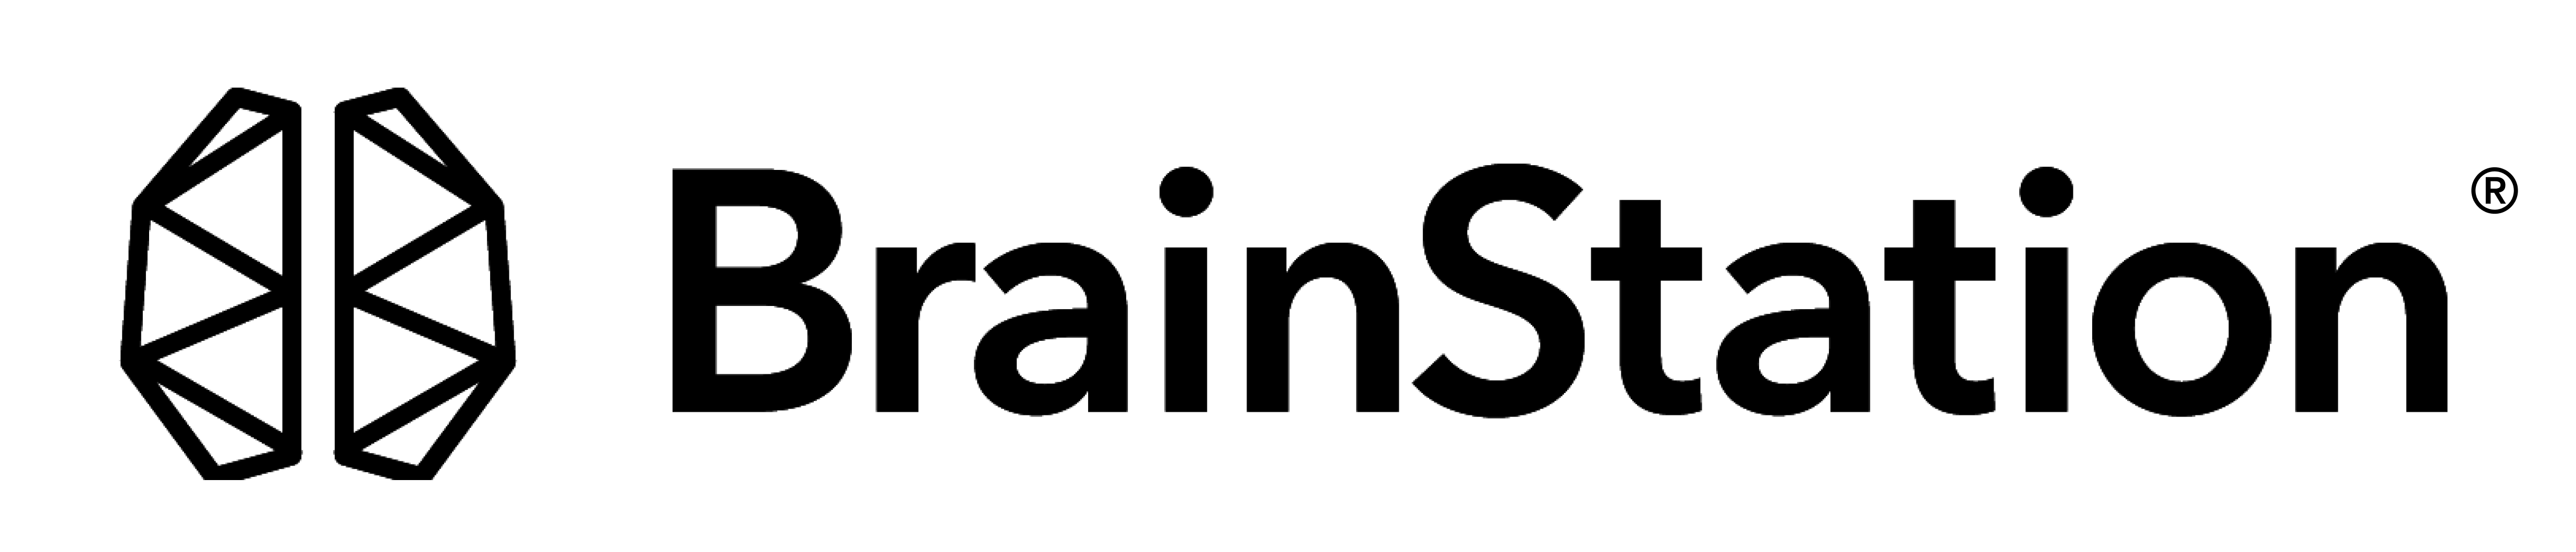
</div>
</div>


# Learning Outcomes

- Learn how to join multiple datasets and aggregate their values using Pandas.
- Learn proficiency in utilizing popular Python libraries to create informative data visualizations.
- Master the ability to choose the most effective visualization technique for your specific data.

# Lesson Introduction

In our previous lesson, we explored the use of Pandas for basic data analysis and cleaning. This lesson will build on that foundation by introducing more advanced data processing techniques like joining dataframes, aggregating and transforming data, and sorting based on various indices. These transformations help move data from various sources in one place and explore potential relationships hidden within our data. We will also cover how to create data visualizations to effectively identify patterns within the data to communicate insights.

Table of Contents
=================

1. [Lesson Introduction](#Lesson-Introduction)
2. [Data Integrations](#Data-Integrations)
   - [Dataframe Joins](#Dataframe-Joins)
   - [Sorting](#Sorting)
3. [Grouping, transforming, and aggregating](#Grouping,-transforming,-and-aggregating)
   - [Aggregation](#Aggregation)
   - [Transformation](#Transformation)
4. [What is Data Visualization?](#What-is-Data-Visualization?)
   - [Units and Variables](#Units-and-Variables)
   - [Marks and Channels](#Marks-and-Channels)
   - [Matplotlib](#Matplotlib)
     + [Scatter Plots](#Scatter-Plots)
     + [Bar Plots](#Bar-Plots)
     + [Histograms](#Histograms)
     + [Line Plots](#Line-Plots)
     + [Subplots](#Subplots)
5. [Seaborn](#Seaborn)
   - [Scatter Plots](#Scatter-Plots)
   - [Scatter Matrices](#Scatter-Matrices)
6. [Key Takeaways](#Key-Takeaways)
7. [Next Up](#Next-Up)
8. [Assignment 3](#Assignment-3)
9. [Supplementary Topics](#Supplementary-Topics)
   - [Bokeh](#Bokeh)
   - [Plotly](#Plotly)

## Data Integrations

One of the most important and powerful things that you can do as a data scientist is to integrate data from different sources into a single data set for analysis. Pandas provides a few ways to do this. These methods are inspired by database systems, which are computing environments optimized for storing multiple data sets and facilitating retrieval and integration of data. The following diagram demonstrates the intuition behind how these work for databases:

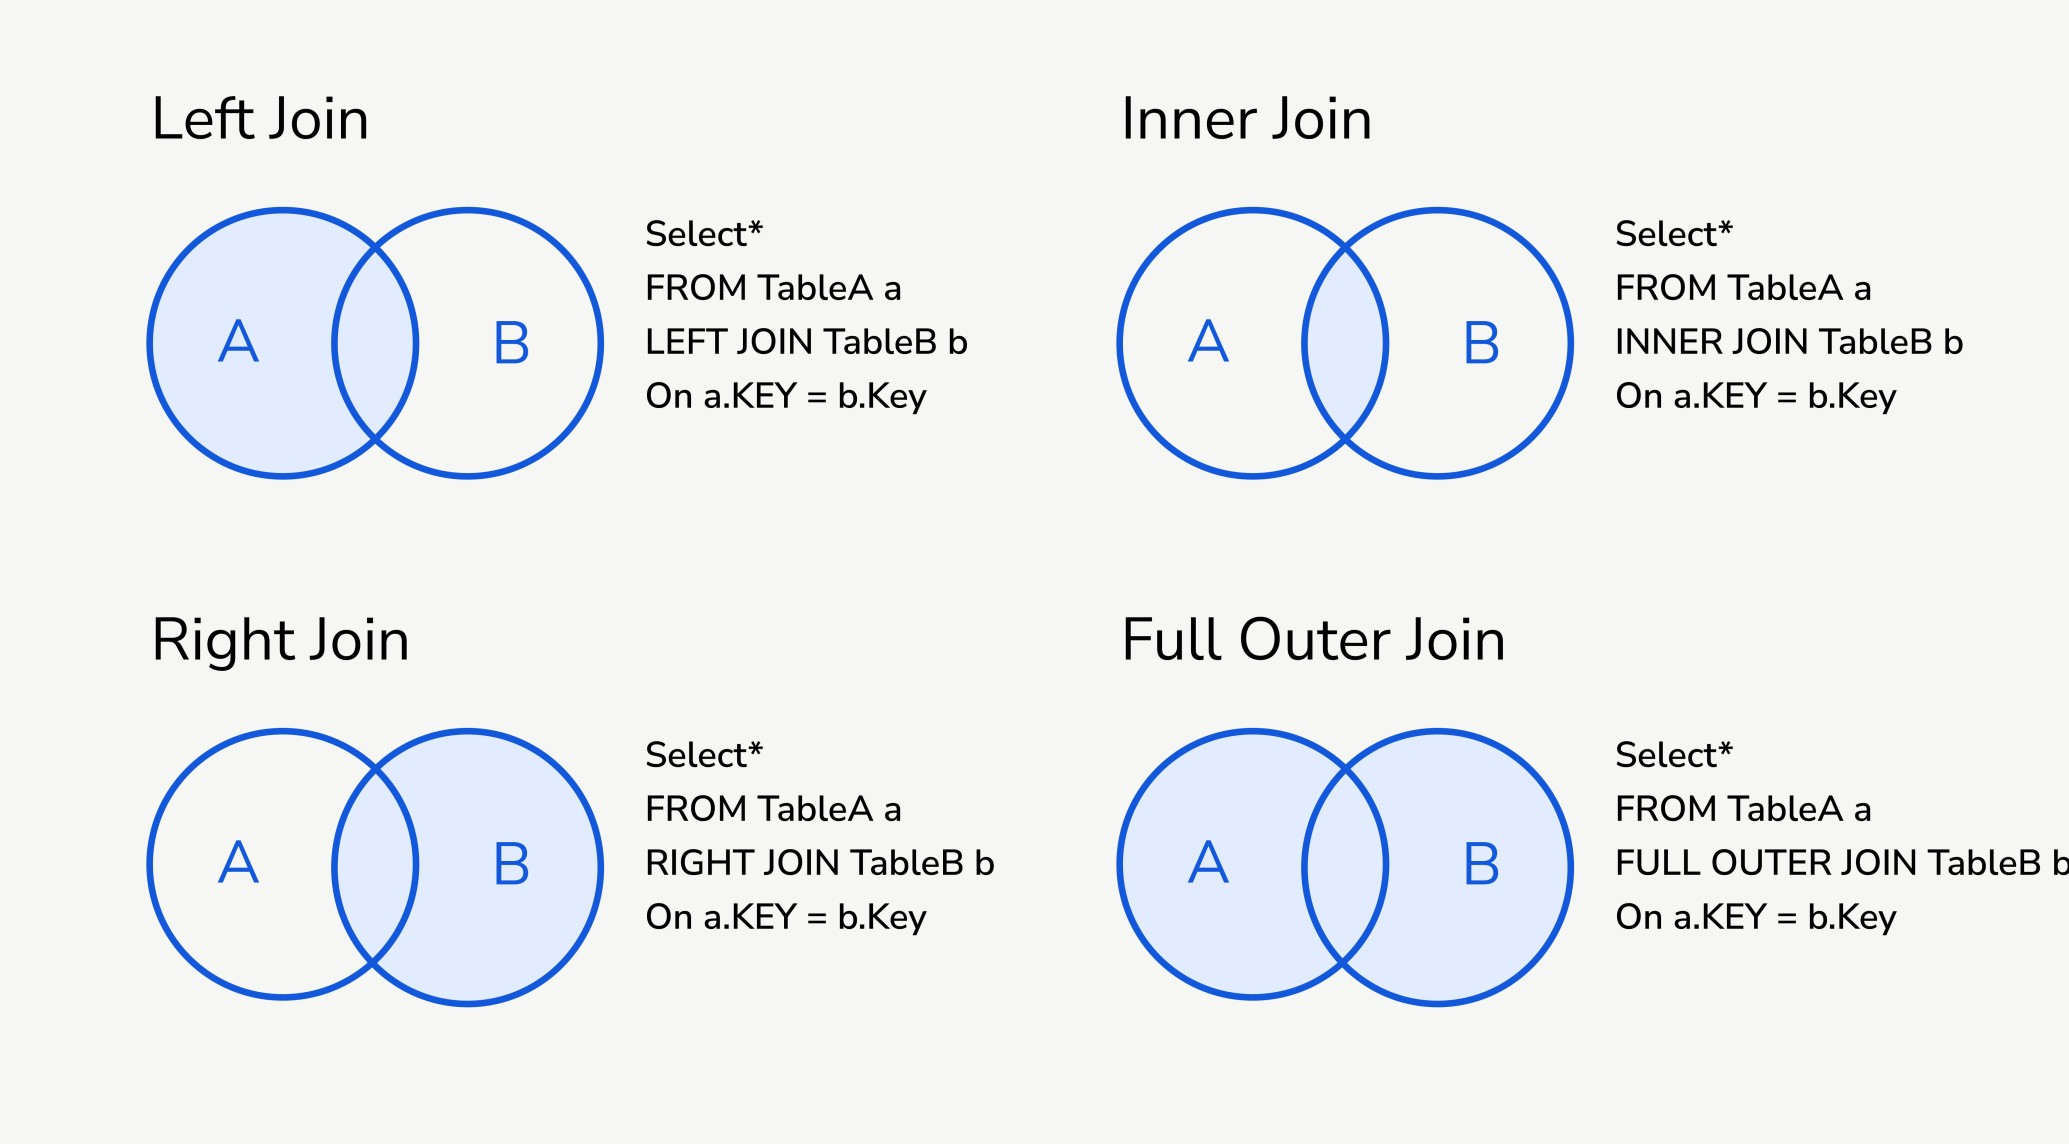

### Dataframe Joins

Joining dataframes together is a way of combining the columns of two dataframes to create a new dataframe with columns from each. In order to do this, the dataframes need to share at least one column in common. The shared columns are sometimes referred to as "keys".

To practice joining dataframes together, load up the `planes.csv` and `flights.csv` datasets, which are sampled from `nycflights23` dataset, a dataset containing information about flights that departed from New York City in 2023. All required datasets can be found in Synapse for this lesson.

In [2]:
# First we import the libraries for this lesson

import pandas as pd
import numpy as np

from warnings import filterwarnings

filterwarnings(action='ignore')

In [3]:
# First I import my libraries for this lesson
import pandas as pd
import numpy as np
from warnings  import filterwarnings
filterwarnings(action='ignore')

In [42]:
flights = pd.read_csv('flights.csv', on_bad_lines='skip')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500.0,20.0,38.0,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760.0,23.0,0.0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576.0,23.0,44.0,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636.0,21.0,40.0,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488.0,20.0,48.0,2023-01-01 20:00:00


In [43]:
flights = pd.read_csv('flights.csv')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500.0,20.0,38.0,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760.0,23.0,0.0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576.0,23.0,44.0,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636.0,21.0,40.0,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488.0,20.0,48.0,2023-01-01 20:00:00


In [44]:
planes = pd.read_csv('planes.csv')
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan


In [45]:
planes = pd.read_csv('planes.csv')
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan


For full details on what each column in this dataset represents, check the reference manual [here](https://rdrr.io/cran/nycflights23/man/flights.html). When working with new data, it is *very* important to understand what each row represents. Rows are individual observations. The `flights` dataframe has one _flight_ per row. Each flight has an origin and a destination, takes place on a particular aircraft, and occurs on a particular day. The `planes` dataframe contains one _plane_ per row. The plane is of a certain manufacturer, has certain specifications, and has a unique identifier known called the tail number, located in the `tailnum` column.

The `flights` dataset allows us to answer questions like,

- How long was the average flight?
- Which carrier operates the most flights?
- What time of the year has majority of the flights?

The `planes` dataset allows us to answer questions like,

- What manufacturer produced the most planes that are operated in NYC?
- What is the most common number of engines on aircraft?
- What is the distribution of seats across various aircrafts?

Combining the datasets together opens up a world of questions that we can ask. For instance, questions like **"what type of aircraft flew the farthest out of New York?"**, or **"are older aircraft more likely to be delayed?"** cannot be answered by either dataset individually, but can be answered with a new dataset formed by integrating the two together.

#### Left and Right Joins

For convenience, let's work with smaller versions of these datasets.

In [46]:
flights2 = flights[["dest", "origin", "dep_delay",
                    "arr_delay", "distance", "tailnum"]]

planes2 = planes[["tailnum", "type", "engines"]]

In [47]:
# Smaller versions of the datasets
flights2 = flights[['dest', 'origin','dep_delay', 'arr_delay', 'distance', 'tailnum']]

planes2 = planes[['tailnum', 'type', 'engines']]

flights2.head()


,dest,origin,dep_delay,arr_delay,distance,tailnum
0,SMF,EWR,203.0,205.0,2500.0,N25201
1,ATL,JFK,78.0,53.0,760.0,N830DN
2,BQN,JFK,47.0,34.0,1576.0,N807JB
3,CHS,JFK,173.0,166.0,636.0,N265JB
4,DTW,EWR,228.0,211.0,488.0,N17730


In [48]:
planes2.head()

,tailnum,type,engines
0,N101DQ,Fixed wing multi engine,2
1,N101DU,Fixed wing multi engine,2
2,N101HQ,Fixed wing multi engine,2
3,N101NN,Fixed wing multi engine,2
4,N102DN,Fixed wing multi engine,2


Our flights and planes datasets have a column in common: the `tailnum` column, which specifies a unique aircraft. So to join the datasets together, we let Pandas know that the shared column is `tailnum`, and put the datasets together around that column. If we're lucky, all of the planes in the `flights` dataset are contained in the `planes` dataset, and conversely, all of the planes in the `planes` dataset are contained in the `flights` dataset. Then joining is simple.

Unfortunately, this ideal scenario is not common. More likely, there will be flights in the `flights` dataset that refer to planes not contained in the `planes` dataset, or vice versa. In these cases, we must specify which observations to keep. Do we want to keep the flights without corresponding planes? Or do we want to throw those out?

In [49]:
# A Left Join

left_joined = pd.merge(flights2,       # the "left" dataframe
                       planes2,        # the "right" dataframe
                       how='left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
                       on='tailnum'  # the join key
                       )

left_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2.0
1,ATL,JFK,78.0,53.0,760.0,N830DN,Fixed wing multi engine,2.0
2,BQN,JFK,47.0,34.0,1576.0,N807JB,Fixed wing multi engine,2.0
3,CHS,JFK,173.0,166.0,636.0,N265JB,Fixed wing multi engine,2.0
4,DTW,EWR,228.0,211.0,488.0,N17730,Fixed wing multi engine,2.0


In [50]:
# A left join
left_joined = pd.merge(flights2,
                       planes2,
                       how='left',
                       on='tailnum')

left_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2.0
1,ATL,JFK,78.0,53.0,760.0,N830DN,Fixed wing multi engine,2.0
2,BQN,JFK,47.0,34.0,1576.0,N807JB,Fixed wing multi engine,2.0
3,CHS,JFK,173.0,166.0,636.0,N265JB,Fixed wing multi engine,2.0
4,DTW,EWR,228.0,211.0,488.0,N17730,Fixed wing multi engine,2.0


If we inspect this joined dataset, we can see that there are flights that their corresponding plane doesn't exist in the plane dataset.

In [51]:
# A Right Join

right_joined = pd.merge(flights2, planes2, how='right', on='tailnum')

right_joined

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,MCO,LGA,-4.0,18.0,950.0,N101DQ,Fixed wing multi engine,2
1,ATL,LGA,17.0,-1.0,762.0,N101DQ,Fixed wing multi engine,2
2,MCO,JFK,-2.0,-29.0,944.0,N101DQ,Fixed wing multi engine,2
3,MCO,LGA,-4.0,-37.0,950.0,N101DQ,Fixed wing multi engine,2
4,ATL,LGA,-9.0,-22.0,762.0,N101DQ,Fixed wing multi engine,2
...,...,...,...,...,...,...,...,...
424063,ONT,JFK,-1.0,-27.0,2429.0,N999JQ,Fixed wing multi engine,2
424064,SJU,JFK,2.0,4.0,1598.0,N999JQ,Fixed wing multi engine,2
424065,ONT,JFK,15.0,-26.0,2429.0,N999JQ,Fixed wing multi engine,2
424066,BOS,JFK,13.0,13.0,187.0,N999JQ,Fixed wing multi engine,2


In [52]:
# A right Join

right_joined = pd.merge(flights2, planes2, how='right', on='tailnum')
right_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,MCO,LGA,-4.0,18.0,950.0,N101DQ,Fixed wing multi engine,2
1,ATL,LGA,17.0,-1.0,762.0,N101DQ,Fixed wing multi engine,2
2,MCO,JFK,-2.0,-29.0,944.0,N101DQ,Fixed wing multi engine,2
3,MCO,LGA,-4.0,-37.0,950.0,N101DQ,Fixed wing multi engine,2
4,ATL,LGA,-9.0,-22.0,762.0,N101DQ,Fixed wing multi engine,2


In [53]:
# flights 2 and left join have the same number of rows.

print(flights2.shape)
print(left_joined.shape)

(435352, 6)
(435352, 8)


In [54]:
print(flights2.shape)
print(left_joined.shape)

(435352, 6)
(435352, 8)


In [55]:
# right joined and planes2 don't have the same number of rows. WHY?

print(planes2.shape)
print(right_joined.shape)

(4840, 3)
(424068, 8)


In [56]:
print(planes2.shape)
print(right_joined.shape)

(4840, 3)
(424068, 8)


#### Inner and Outer Joins

In [57]:
# An inner join keeps rows that exist in *both* tables, and throws out rows that exist in one but are missing from the other

inner_joined = pd.merge(flights2, planes2, how='inner', on='tailnum')

inner_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2
1,ATL,JFK,78.0,53.0,760.0,N830DN,Fixed wing multi engine,2
2,BQN,JFK,47.0,34.0,1576.0,N807JB,Fixed wing multi engine,2
3,CHS,JFK,173.0,166.0,636.0,N265JB,Fixed wing multi engine,2
4,DTW,EWR,228.0,211.0,488.0,N17730,Fixed wing multi engine,2


In [58]:
# An inner join keeps rows that exist in both tables abd hrows out rows that exist in one but are missing from the other

inner_joined = pd.merge(flights2, planes2, how= 'inner', on='tailnum')
inner_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2
1,ATL,JFK,78.0,53.0,760.0,N830DN,Fixed wing multi engine,2
2,BQN,JFK,47.0,34.0,1576.0,N807JB,Fixed wing multi engine,2
3,CHS,JFK,173.0,166.0,636.0,N265JB,Fixed wing multi engine,2
4,DTW,EWR,228.0,211.0,488.0,N17730,Fixed wing multi engine,2


In [59]:
# shape of inner join

inner_joined.shape

(424068, 8)

In [60]:
inner_joined.shape

(424068, 8)

In [61]:
# An outer join keeps all rows.

outer_joined = pd.merge(flights2, planes2, how='outer', on='tailnum')

outer_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,VPS,EWR,3.0,12.0,988.0,190NV,NaN,NaN
1,AVL,EWR,6.0,6.0,583.0,190NV,NaN,NaN
2,AVL,EWR,-7.0,12.0,583.0,190NV,NaN,NaN
3,AVL,EWR,-9.0,-7.0,583.0,190NV,NaN,NaN
4,AVL,EWR,-8.0,-12.0,583.0,190NV,NaN,NaN


In [62]:
# an outer join keeps all rows from both tables
outer_joined = pd.merge(flights2, planes2, how ='outer', on='tailnum')
outer_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,VPS,EWR,3.0,12.0,988.0,190NV,NaN,NaN
1,AVL,EWR,6.0,6.0,583.0,190NV,NaN,NaN
2,AVL,EWR,-7.0,12.0,583.0,190NV,NaN,NaN
3,AVL,EWR,-9.0,-7.0,583.0,190NV,NaN,NaN
4,AVL,EWR,-8.0,-12.0,583.0,190NV,NaN,NaN


In [63]:
# shape of outer join

outer_joined.shape

(435352, 8)

In [64]:
#shape of the outer join

outer_joined.shape

(435352, 8)

### Sorting

Pandas provides a number of ways to sort a dataframe.

In [65]:
# sort the planes dataset by manufacturer
# the inplace argument says to modify the original dataframe rather than

planes.sort_values(by = 'manufacturer', inplace=True)

# output a copy

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
2112,N507AY,2008.0,Fixed wing multi engine,AIRBUS,A321-231,2,379,0,Turbo-fan
2111,N506NK,2005.0,Fixed wing multi engine,AIRBUS,A319-132,2,179,0,Turbo-fan
2109,N506DA,2022.0,Fixed wing multi engine,AIRBUS,A321-271NX,2,246,0,Turbo-fan
2107,N505NK,2005.0,Fixed wing multi engine,AIRBUS,A319-132,2,179,0,Turbo-fan


#Sorting


## Pandas provide a way to sort a dataframe

In [66]:
#sort the planes dataset by manufacturer
# the inplace argument says to modify the original dataframe rather than
planes.sort_values(by = 'manufacturer', inplace=True)

#output a copy
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1026,N301FR,2016.0,Fixed wing multi engine,AIRBUS,A320-251N,2,190,0,Turbo-jet
4009,N878UA,2005.0,Fixed wing multi engine,AIRBUS,A319-132,2,179,0,Turbo-fan
3982,N876UA,2004.0,Fixed wing multi engine,AIRBUS,A319-132,2,179,0,Turbo-fan
2603,N655NK,2018.0,Fixed wing multi engine,AIRBUS,A320-232,2,200,0,Turbo-fan


In [67]:
# sort the planes dataset by manufacturer, descnding (i.e. Z to A)
# the inplace argument says to modify the original dataframe rather than

planes.sort_values('manufacturer', ascending=False, inplace=True)

# output a copy

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
210,N135NK,2006.0,Rotorcraft,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2+,2,7,0,Turbo-shaft
673,N230JQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
560,N207JQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
2414,N604CZ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
33,N107HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan


In [68]:
#sort the planes dataset by manufacturer, descending (Z to A)
# the inplace argument sayd yo modify the original dataframe rather than
planes.sort_values('manufacturer', ascending=False, inplace=True)

#output a copy
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
210,N135NK,2006.0,Rotorcraft,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2+,2,7,0,Turbo-shaft
643,N224JQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
164,N127HQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
609,N216JQ,2009.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
188,N131HQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan


In [69]:
# sort the planes dataset by manufacturer, model, and year

planes.sort_values(['manufacturer', 'model', 'year'], inplace=True)

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
3122,N772XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3154,N774XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3104,N771XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3136,N773XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3176,N775XF,2004.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan


In [70]:
#sort the planes datset by manufacturer, model, and year
planes.sort_values(['manufacturer','model', 'year'], ascending= False, inplace=True)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
210,N135NK,2006.0,Rotorcraft,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2+,2,7,0,Turbo-shaft
609,N216JQ,2009.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
605,N215JQ,2009.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
643,N224JQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
164,N127HQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan


If we want to sort by index, there's a special method for that.

In [71]:
# Sorting the dataframe by index

planes.sort_index(inplace=True)

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan


In [72]:
#Sorting the dataframe by index
planes.sort_index(inplace=True)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan


Here, the index is not particularly meaningful, so sorting by index isn't really important. But if we had a time series it would be very important.

---

#### Exercise 1

1. Find the total number of flights that don't have plane information in the planes dataset?
2. What are top 10 flights with the highest number of seats?
    
---

In [73]:
# Write your code here
#flights left plane right
flight_no_plane = left_joined[left_joined['type'].isnull()]
num_flights_with_no_planes = flight_no_plane.shape[0]

num_flights_with_no_planes


flight_no_plane = left_joined[left_joined['type'].isnull()]
num_flights_with_no_planes = flight_no_plane.shape[0]
num_flights_with_no_planes

11284

### Grouping, transforming, and aggregating

A very important pattern in data analysis is the split-apply-combine pattern. Split-apply-combine works as follows

- *Split* a dataframe into groups
- *Apply* transformations to the groups
- *Combine* the transformed groups

This pattern is implemented using the `grouped` dataframe object in Pandas. The block of code creates a `grouped` dataframe out of the `planes` dataset, grouped by `type`.

split
apply transformations
combine transformations

In [74]:
grouped = planes.groupby('type')
grouped

In [75]:
grouped = planes.groupby('type')
grouped

planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
...,...,...,...,...,...,...,...,...,...
4835,N998AN,2017.0,Fixed wing multi engine,AIRBUS,A321-231,2,379,0,Turbo-fan
4836,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,0,Turbo-fan
4837,N998JE,2018.0,Fixed wing multi engine,AIRBUS,A321-231,2,379,0,Turbo-fan
4838,N998NN,2016.0,Fixed wing multi engine,BOEING,737-800,2,189,0,Turbo-fan


#### Aggregation

An _aggregating function_ is a function that takes a bunch of values and returns a single number. Some examples include `sum`, `mean`, `len`, etc. An _aggregation_ on a grouped dataframe applies an aggregating function to each group, and returns a dataframe with a single row per group. It is performed with the `.agg` method, which is a type of function that takes a function as its argument.

In [76]:
grouped.agg(len)

,tailnum,year,manufacturer,model,engines,seats,speed,engine
type,,,,,,,,
Fixed wing multi engine,4838,4838,4838,4838,4838,4838,4838,4838
Fixed wing single engine,1,1,1,1,1,1,1,1
Rotorcraft,1,1,1,1,1,1,1,1


In [77]:
grouped.agg(len)

,tailnum,year,manufacturer,model,engines,seats,speed,engine
type,,,,,,,,
Fixed wing multi engine,4838,4838,4838,4838,4838,4838,4838,4838
Fixed wing single engine,1,1,1,1,1,1,1,1
Rotorcraft,1,1,1,1,1,1,1,1


In [78]:
grouped.agg(len)

,tailnum,year,manufacturer,model,engines,seats,speed,engine
type,,,,,,,,
Fixed wing multi engine,4838,4838,4838,4838,4838,4838,4838,4838
Fixed wing single engine,1,1,1,1,1,1,1,1
Rotorcraft,1,1,1,1,1,1,1,1


Note that this applied the `len` function to each column, by group. We can also perform selections on a grouped dataframe.

In [79]:
# Applying agg only on 'tailnum' column returns a pandas series

grouped['tailnum'].agg(len)

,tailnum
type,
Fixed wing multi engine,4838
Fixed wing single engine,1
Rotorcraft,1


In [80]:
#Applying agg only on 'tailnum' column returns a pandas series
grouped['tailnum'].agg(len)

,tailnum
type,
Fixed wing multi engine,4838
Fixed wing single engine,1
Rotorcraft,1


This last operation is so common that it is implemented as its own method on grouped dataframes:

In [81]:
grouped.size()

,0
type,
Fixed wing multi engine,4838
Fixed wing single engine,1
Rotorcraft,1


In [82]:
grouped.size()

,0
type,
Fixed wing multi engine,4838
Fixed wing single engine,1
Rotorcraft,1


You can write your own functions for aggregations and pass them to `.agg`.

In [83]:
def my_agg_fun(series):

    if any(series > 2):

        return "sometimes over 2"

    else:

        return "never over 2"

In [84]:
def my_agg_fun(series):
  if any(series > 2):
    return 'sometimes over 2'
  else:
    return 'never over 2'


In [85]:
grouped[['engines', 'seats']].agg(my_agg_fun)

,engines,seats
type,,
Fixed wing multi engine,sometimes over 2,sometimes over 2
Fixed wing single engine,never over 2,sometimes over 2
Rotorcraft,never over 2,sometimes over 2


In [86]:
grouped[['engines', 'seats']].agg(my_agg_fun)

,engines,seats
type,,
Fixed wing multi engine,sometimes over 2,sometimes over 2
Fixed wing single engine,never over 2,sometimes over 2
Rotorcraft,never over 2,sometimes over 2


You can apply multiple aggregating functions at the same time by passing a list of functions.

In [87]:
grouped['engines'].agg([min, max, my_agg_fun, np.mean])

,min,max,my_agg_fun,mean
type,,,,
Fixed wing multi engine,2,3,sometimes over 2,2.00062
Fixed wing single engine,1,1,never over 2,1.00000
Rotorcraft,2,2,never over 2,2.00000


In [88]:
grouped['engines'].agg([min, max, my_agg_fun, np.mean])


,min,max,my_agg_fun,mean
type,,,,
Fixed wing multi engine,2,3,sometimes over 2,2.00062
Fixed wing single engine,1,1,never over 2,1.00000
Rotorcraft,2,2,never over 2,2.00000


In [89]:
grouped['engines'].agg([min, max, my_agg_fun, np.mean])

,min,max,my_agg_fun,mean
type,,,,
Fixed wing multi engine,2,3,sometimes over 2,2.00062
Fixed wing single engine,1,1,never over 2,1.00000
Rotorcraft,2,2,never over 2,2.00000


#### Transformation

Sometimes you prefer to have a return value that is on the same index as the original data, rather than one row per group. This is similar to `Window functions` in SQL. This is done with the `transform` method.


Subtract the average of the series from the actual series normalize by dividing by the standard deviation

In [90]:
def standardize(series):

    return (series - series.mean())/series.std()


planes['seats_std'] = grouped['seats'].transform(standardize)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,seats_std
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan,0.098064
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan,-0.614363
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan,-1.186464
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan,2.041048
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan,0.098064


In [91]:
def standardize(series):
  return (series - series.mean())/series.std()

planes['seats_std'] = grouped['seats'].transform(standardize)
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,seats_std
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan,0.098064
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan,-0.614363
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan,-1.186464
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan,2.041048
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan,0.098064


**bold text**---

#### Exercise 2

1. Calculate the total number of flights and the average duration of flights per airline.
2. What are the top 3 manufacturers with the highest number of planes manufactured after the year 2000?
    
---

In [92]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500.0,20.0,38.0,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760.0,23.0,0.0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576.0,23.0,44.0,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636.0,21.0,40.0,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488.0,20.0,48.0,2023-01-01 20:00:00


In [93]:
flights.groupby('carrier').agg({'tailnum':np.size, 'air_time': 'mean'})

,tailnum,air_time
carrier,,
9E,54141,79.083997
AA,40525,165.977031
AS,7843,331.306568
B6,66169,160.746080
DL,61562,178.615582
F9,1286,137.347291
G4,671,107.016492
HA,366,623.287293
MQ,357,117.646893


In [94]:
#Q2: Top 3 manufacturers with the highest number of planes manufactured after the year 2000?
# Filter planes manufactured after year 2000
planes_filtered  = planes[planes['year']>2000]
#Calculating the count of planes for each manufacturer
planes_filtered.groupby('manufacturer')['tailnum'].count().sort_values(ascending = False).head(3)

# filter the planes table for after the year 2000
#groupby manufacturer first then count the planes and return just top 3
planes_filtered = planes[planes['year']>2000]
planes_filtered.groupby('manufacturer')['tailnum'].count().sort_values(ascending = False).head(3)


,tailnum
manufacturer,
BOEING,2012
AIRBUS,1078
EMBRAER S A,267


In [95]:
planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,seats_std
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan,0.098064
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan,-0.614363
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan,-1.186464
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan,2.041048
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan,0.098064
...,...,...,...,...,...,...,...,...,...,...
4835,N998AN,2017.0,Fixed wing multi engine,AIRBUS,A321-231,2,379,0,Turbo-fan,2.041048
4836,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,0,Turbo-fan,-0.970577
4837,N998JE,2018.0,Fixed wing multi engine,AIRBUS,A321-231,2,379,0,Turbo-fan,2.041048
4838,N998NN,2016.0,Fixed wing multi engine,BOEING,737-800,2,189,0,Turbo-fan,-0.009880


## What is Data Visualization?

Now that we have learned how to process and clean a dataset, the next step in our workflow will be to visualize the data to find trends and patterns and extract key insights that can be used for making actionable business decisions.

A data visualization is _mapping_ _units_ and _variables_ (quantitative information) to _marks_ and _channels_ to create a visual representation.

*Note:* we are only going to talk about visualizing tabular data (i.e. a spreadsheet, a table, etc.). There are other kinds of data that can be visualized: networks, fields, hypercubes, and all kinds of other things. The general principles that we discuss here apply to those as well, but we may need to adjust our definition to be more general.

### Units and Variables
If you've got a dataset that is formatted properly, each row of your dataset is a group of measurements or observations of a single _thing_. We'll call these _things_ _units_, and the observations or measurements of those units are called _variables_. For instance, in our flights dataset, each row represent a flight, which is our unit and the different features or columns in the dataset represent our variables.

**Units**: Flights

**Variables**: ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'time_hour']

### Marks and Channels

Marks and channels are the elements of the visual space that are used to represent our data. A mark is the visual analogue of a unit: it is a visual object that our visual perception picks out as an individual. A channel is the visual analogue of a variable: it is a way that a mark can vary.

**Some Common Marks**
- Points
- Lines
- Geometric shapes
- Curves

**Some Common Channels**
- Vertical position
- Horizontal position
- Length
- Width
- Angle
- Orientation
- Area
- Curvature
- Shape
- Hue
- Saturation
- Transparency
- Texture
- Connectedness
- Containment

Neither of these lists is exhaustive.

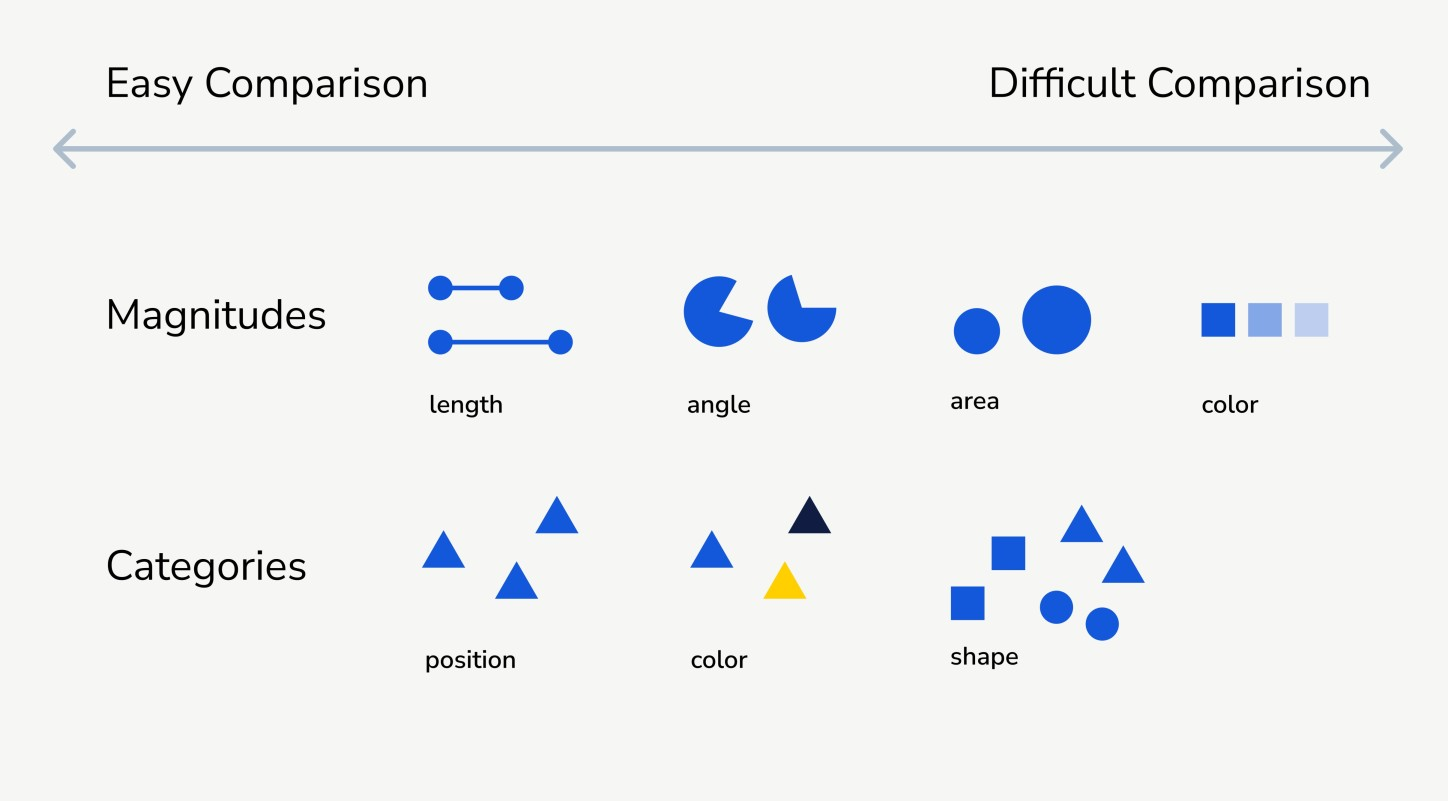

## Matplotlib

Matplotlib was started by John Hunter, a neurobiologist who wanted to port the plotting ability of Matlab to Python. He was a famously welcoming member of the Python community, leading to the creation of the PyData and NumFOCUS organization, which we have to thank for their open source data science stack today.

Our first step will be to import matplotlib, then we tell it how large a picture to show:

In [96]:
import matplotlib.pyplot as plt

In [97]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [98]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # setting default figure size for the notebook

In [99]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)

The basic structure of a Matplotlib plot is

    plt.figure()
    plt.graph_type_of_choice(____________)
    plt.show()


- `plt.figure` sets up a figure object
- `plt.graph_type_of_choice` determines the type of plot we are creating and takes in the data needed, (often DataFrame columns).
- `plt.show` shows the figure on screen

In [100]:
#plt.figure = figure object
#plt.graph_type_of_choice = plot type
#plt.show =show figure

# plt.figure = figure object
# plt.graph_type_of_choice = plot type
#plt.show = show figure


#plt.figure = figure
#plt.graph_type_of_choice = plot type
#plt.show = show figure

### Scatter Plots

A scatter plot is a mapping of the data onto points, with one (usually continuous) variable mapped to the horizontal position, and another (usually continuous) variable mapped to the vertical position.

A useful convention is that in cases where there is a notion of an independent variable and a dependent variable, independent variables are mapped to the _horizontal position_ channel while dependent variables are mapped to the _vertical position_ channel.

The general matplotlib syntax for a scatter plot is:

    plt.figure()
    plt.scatter( x_data, y_data )
    plt.show()

In [101]:
#plt.figure()
#plt.scatter(x_data, y_data)
#plt.show()
#matplotlib syntax


We will use the flights dataset to visualize the individual flights with respect to their arrival and departure delay.  

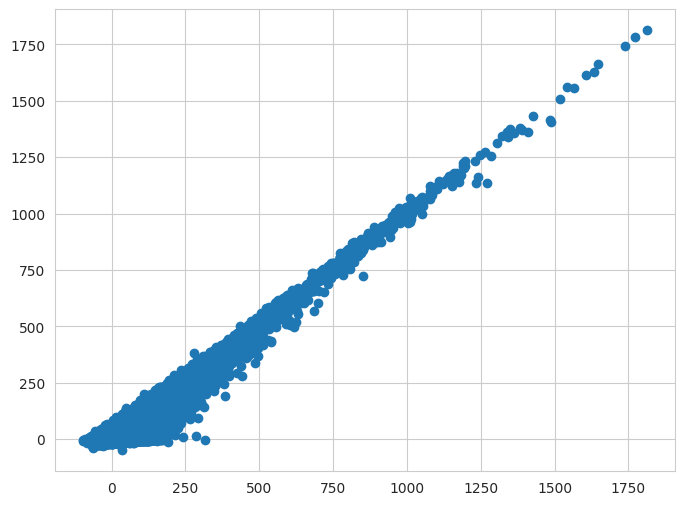

In [102]:
plt.figure()

plt.scatter(flights['arr_delay'], flights['dep_delay'])

plt.show()

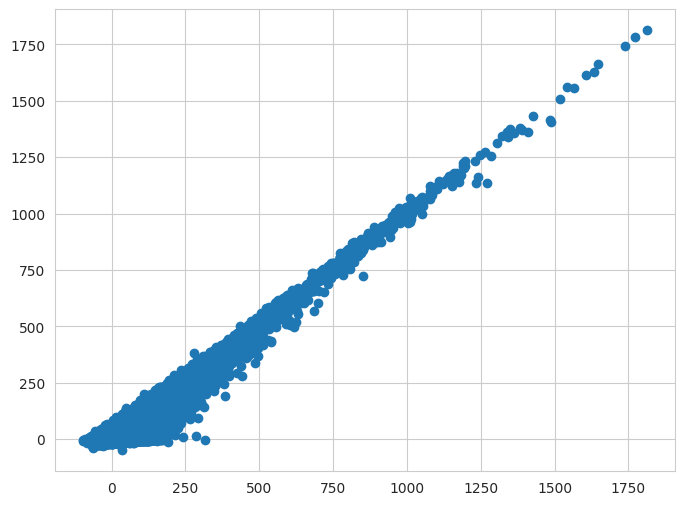

In [103]:
plt.figure()
plt.scatter(flights['arr_delay'], flights['dep_delay'])
plt.show()

Now let's add some axis labels and a title:

Now let me add some axis labels and a title YUH.


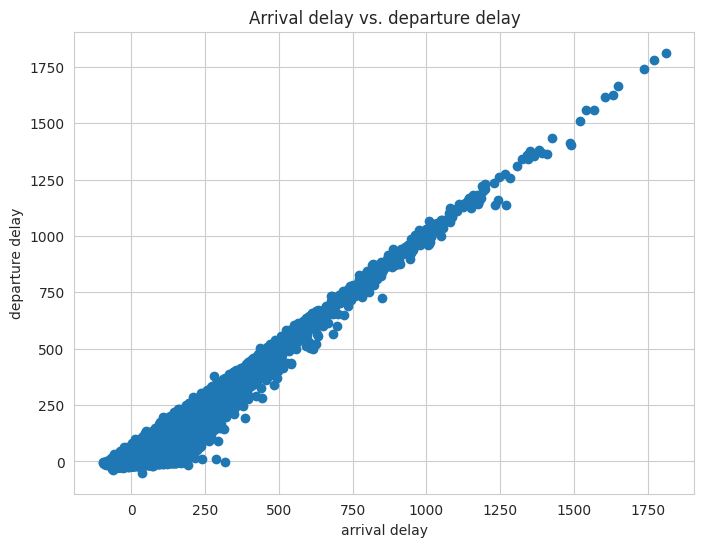

In [104]:
plt.figure()

plt.scatter(flights['arr_delay'], flights['dep_delay'])
plt.xlabel('arrival delay')
plt.ylabel('departure delay')
plt.title('Arrival delay vs. departure delay')

plt.show()

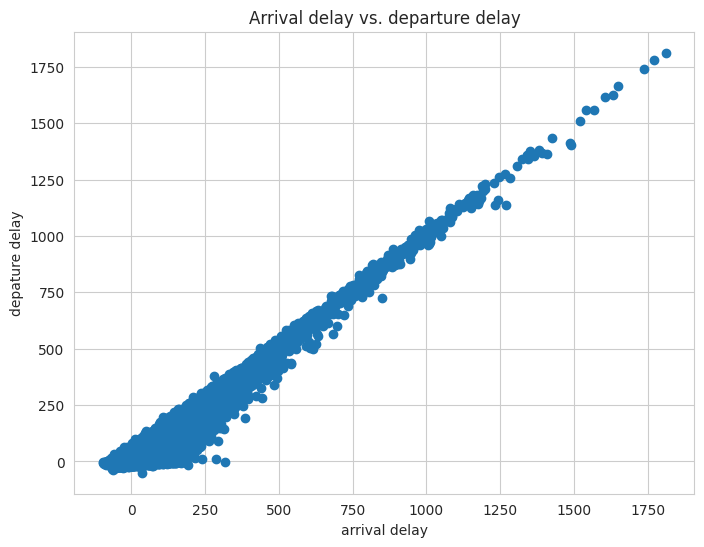

In [105]:
plt.figure()
plt.scatter(flights['arr_delay'], flights['dep_delay'])
plt.xlabel('arrival delay')
plt.ylabel('depature delay')
plt.title('Arrival delay vs. departure delay')
plt.show()

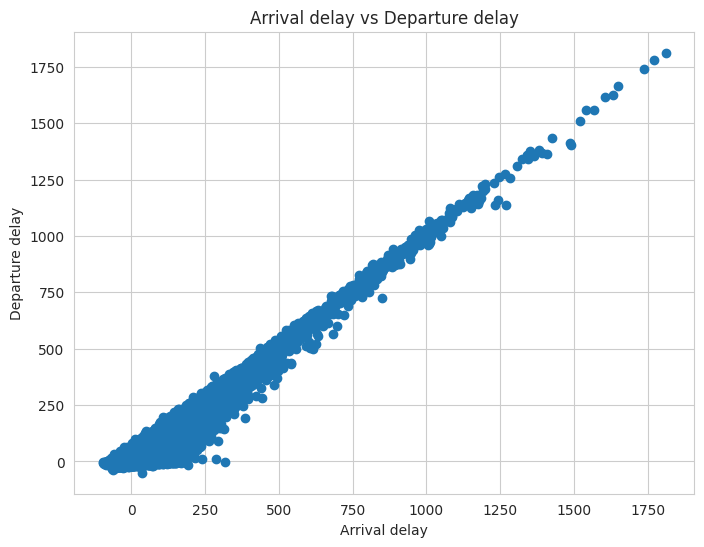

In [106]:
plt.figure()
plt.scatter(flights['arr_delay'], flights['dep_delay'])
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')
plt.title('Arrival delay vs Departure delay')
plt.show()

We can change the size and transparency of the points with `s` and `alpha`, respectively.

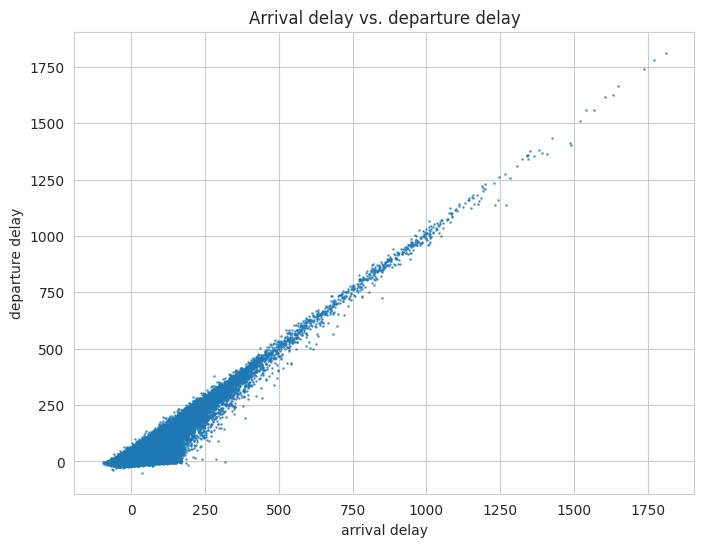

In [107]:
plt.figure()

plt.scatter(flights['arr_delay'], flights['dep_delay'],
            s=0.69, alpha=0.69)
plt.xlabel('arrival delay')
plt.ylabel('departure delay')
plt.title('Arrival delay vs. departure delay')

plt.show()

---

#### Exercise 3

1. How would you interpret the relationship between arrival and departure delay of flights?
    
---

The more the flight is delayed to depart the more delayed the arrival will be YUH

### Bar Plots

A bar plot maps units onto rectangles. A discrete variable is mapped onto the horizontal position of the base of the rectangle, and a continuous variable is mapped onto the height of the rectangle. In order to use a bar plot, it must be the case that for each value of the discrete variable, there is only one value of the continuous variable. This suggests that you'll usually need to do some kind of split-apply-combine operation to create a bar plot.

In [108]:
# Get the total number of planes from top 5 manufacturers with highest number of planes

counts = planes.groupby('manufacturer').size().sort_values(ascending=False).head(5)

counts

,0
manufacturer,
BOEING,2604
AIRBUS,1101
AIRBUS INDUSTRIE,420
EMBRAER S A,276
BOMBARDIER INC,159


In [109]:
# Get the total number of planes from the top 5 manufacturers with the highest number of planes

counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)
counts = planes.groupby('manufacturers').size().sort_values(ascending = False).head(5)

KeyError: 'manufacturers'

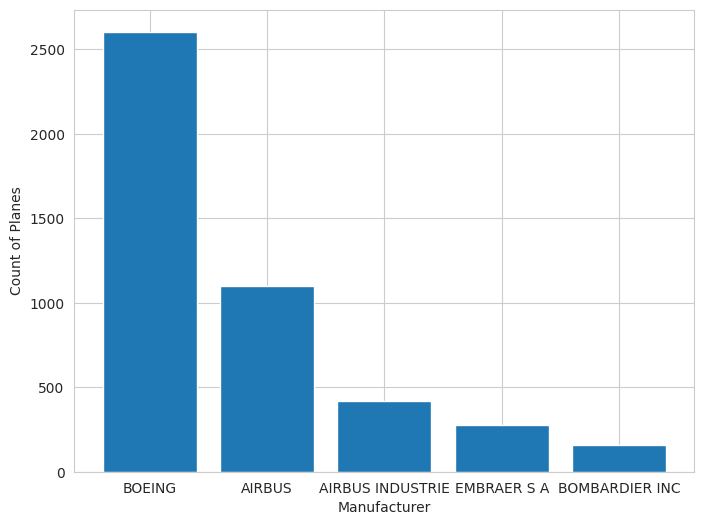

In [110]:
plt.figure()

plt.bar(counts.index, counts)

plt.xlabel('Manufacturer')
plt.ylabel('Count of Planes')
plt.show()

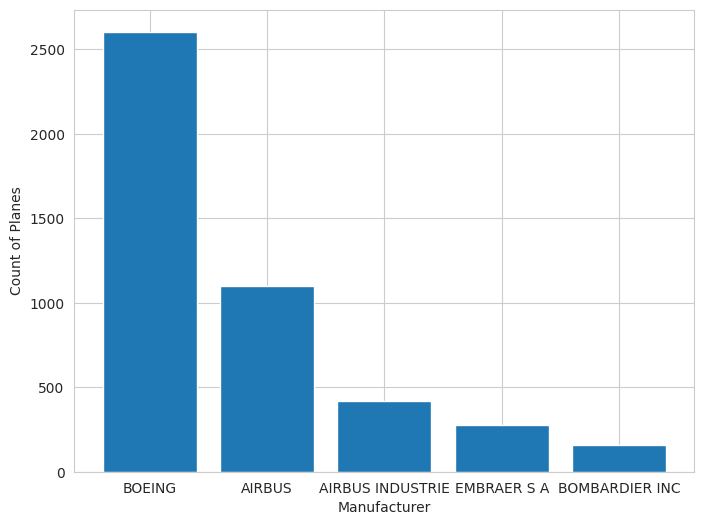

In [111]:
plt.figure()

plt.bar(counts.index , counts)
plt.xlabel('Manufacturer')
plt.ylabel('Count of Planes')

plt.show()

As you can see, the xlabels are overlapping and are not very clear. We can access the xlabel axis and rotate them 45 degrees using `xticks`.

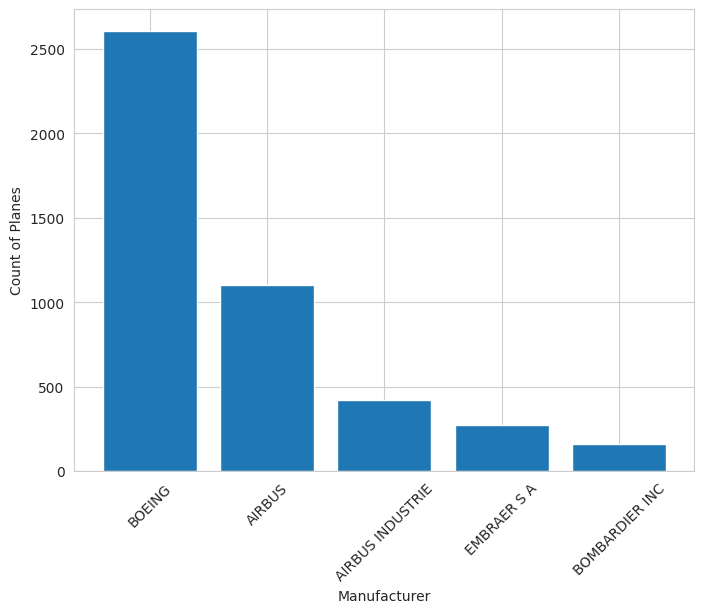

In [112]:
plt.figure()

plt.bar(counts.index, counts)

plt.xlabel('Manufacturer')
plt.ylabel('Count of Planes')

plt.xticks(rotation = 45) # This will rotate the labels by 45 degrees.
plt.show()

Pandas has its own integration with matplotlib through the `.plot()` method or Series and DataFrame objects. Since this method is built on top of matplotlib, we can add axis labels in the same way we use matplotlib.

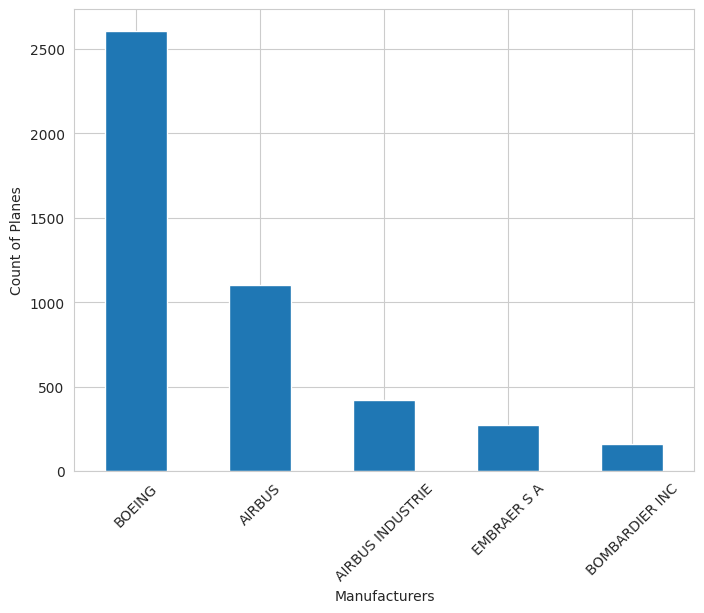

In [113]:
# The default plot is a line chart so we need to specify kind="bar" or "barh"

counts.plot(kind="bar")

plt.xlabel('Manufacturers')
plt.ylabel('Count of Planes')

plt.xticks(rotation = 45) # This will rotate the labels by 45 degrees.

plt.show()

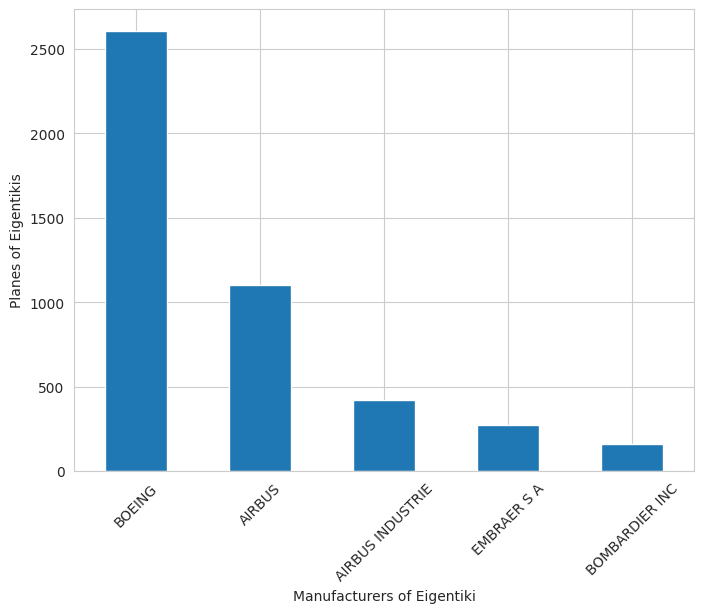

In [114]:
counts.plot(kind="bar")
plt.xlabel('Manufacturers of Eigentiki')
plt.ylabel('Planes of Eigentikis')
plt.xticks(rotation = 45)
plt.show()

### Histograms

A histogram is a way of visualizing the entire distribution of a continuous variable in your dataset. Histograms are created by forming some number of equal width buckets such that each observation fits into exactly one bucket. A bar chart is then formed based of counts of the buckets, producing the distribution visualization.

Histograms are implemented in matplotlib with the `plt.hist()` function:

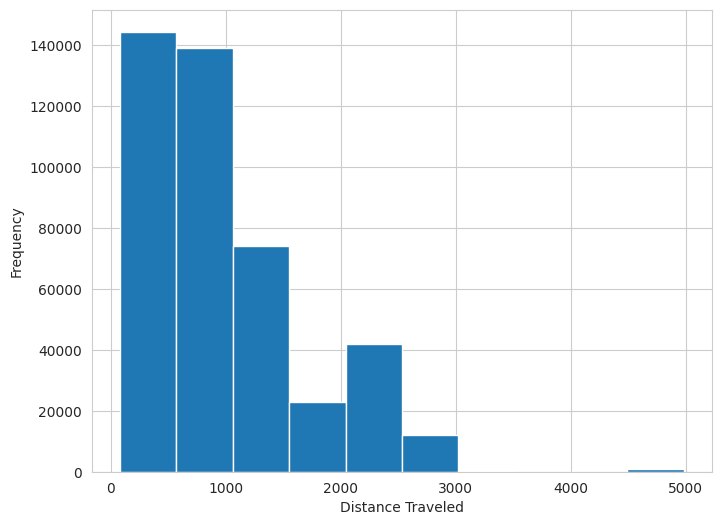

In [115]:
plt.figure()

plt.hist(flights['distance'])
plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')

plt.show()

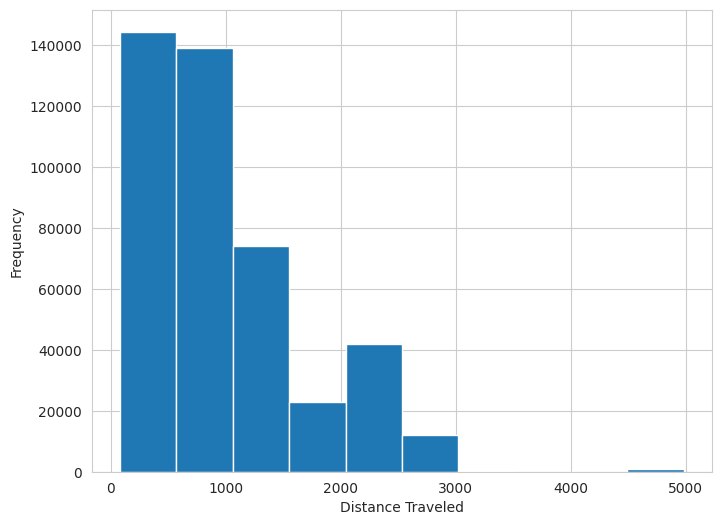

In [116]:
plt.figure()
plt.hist(flights['distance'])
plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')
plt.show()

#'Frequency' isn't a column in your flights table. In a histogram, 'Frequency' is a metric calculated by the visualization itself. It represents the count of how many flights fall into each 'distance traveled' bin (or range) that the histogram creates. So, if you see a bar for a distance range, its height (frequency) tells you how many flights covered that specific distance range.



We can adjust the granularity of a matplotlib histogram with the `bins` argument. The number of bins determine the width of the bars.

```
width = (max_value - min_value) / (bins)

```

width = (max_value - min_value) / (bins)

Reducing bins. = increasing granularity


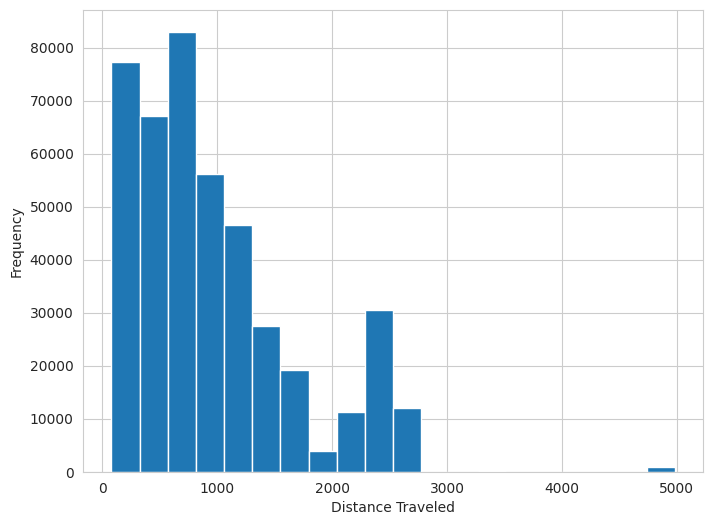

In [117]:
plt.figure()

plt.hist(flights['distance'], bins=20)
plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')

plt.show()

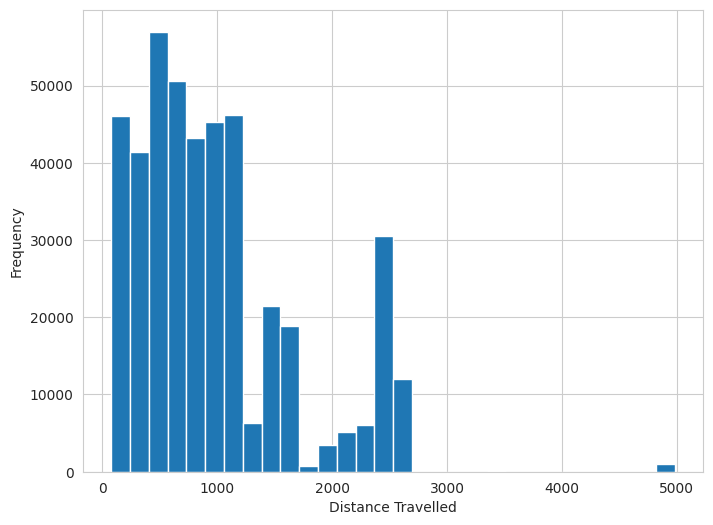

In [118]:
plt.figure()
plt.hist(flights['distance'], bins=30)
plt.xlabel('Distance Travelled')
plt.ylabel('Frequency')
plt.show()

As before, we can use Pandas methods to achieve this too:

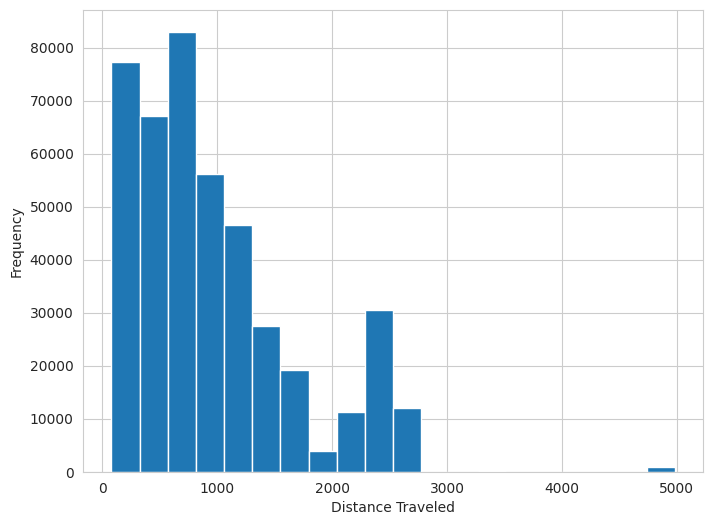

In [119]:
flights['distance'].plot(kind="hist", bins=20)

plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')

plt.show()

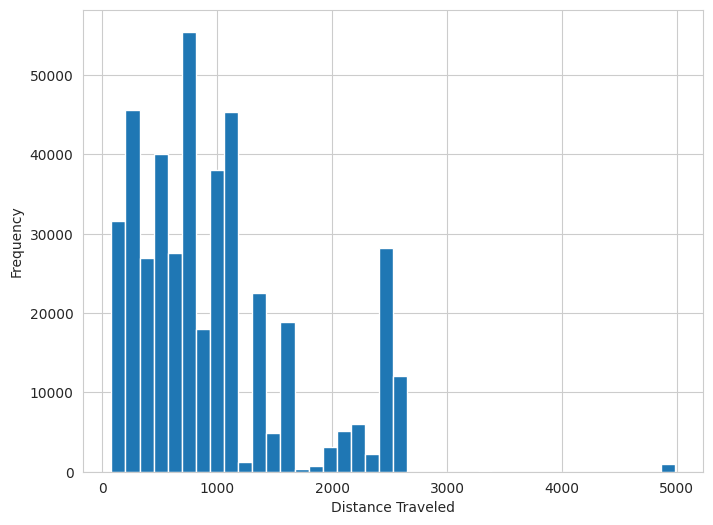

In [120]:
flights['distance'].plot(kind='hist', bins= 40)

plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')
plt.show()

### Line Plots

A line plot is a scatterplot with additional mapping: _consecutiveness_ is mapped to _connectedness_. That is to say, when units appear _consecutively_ in the dataset, their corresponding marks will be _connected_. The most typical way to connect consecutive points is with a line segment.

Typically speaking, line plots are used in time series analysis when the movement of a variable over time should be visualized. For instance, we can look at the total monthly number of flights over a year.


In [121]:
monthly_counts = flights.groupby('month').size()

In [122]:
monthly_counts = flights.groupby('month').size()

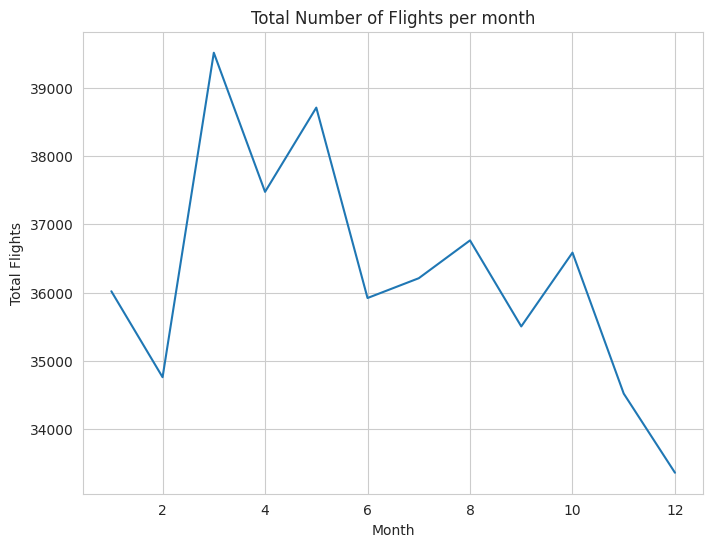

In [123]:
plt.figure()

plt.plot(monthly_counts.index, monthly_counts.values)

plt.xlabel('Month')
plt.ylabel('Total Flights')

plt.title('Total Number of Flights per month')
plt.show()

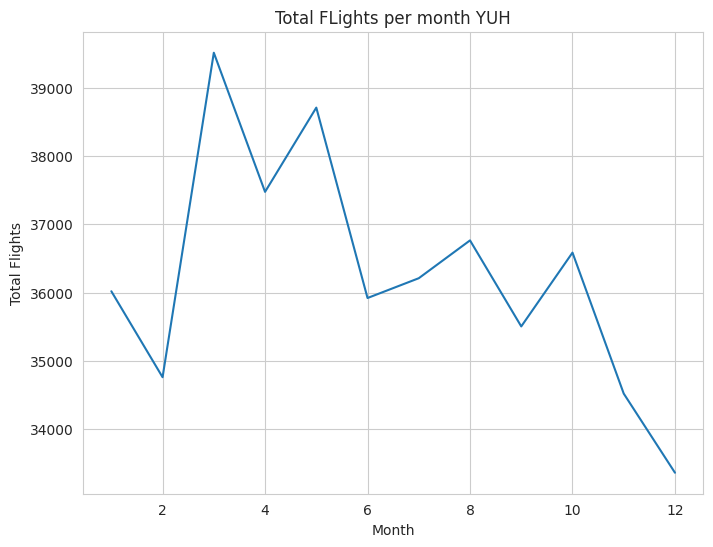

In [124]:
#line plot

plt.figure()

plt.plot(monthly_counts.index, monthly_counts.values )

plt.xlabel('Month')
plt.ylabel('Total Flights')


plt.title('Total FLights per month YUH')
plt.show()

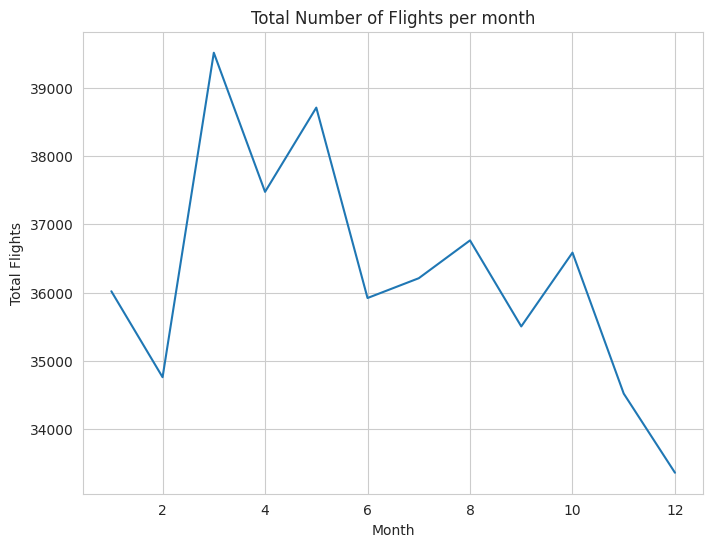

In [125]:
plt.figure()

plt.plot(monthly_counts.index,  monthly_counts.values)

plt.xlabel('Month')
plt.ylabel('Total Flights')

plt.title('Total Number of Flights per month')
plt.show()

We can also visualize two line charts in one figure. Let's now look into the monthly average departure and arrival delays across a year.

In [126]:
# monthly average delay

monthly_delay = flights.groupby('month')[['dep_delay', 'arr_delay']].agg(np.mean)

In [127]:
#monthly average delay

monthly_delay = flights.groupby('month')[['dep_delay', 'arr_delay']].agg(np.mean)
monthly_delay.head(12)


#IF I wanna make a table of monthly average delay i do this
monthly_delay = flights.groupby('month')[['dep_delay','arr_delay']].agg(np.mean)
monthly_delay.head(12)

#to get the mean i gotta aggregate with agg(np.mean)



,dep_delay,arr_delay
month,,
1,14.022910,3.276554
2,11.014993,3.287554
3,13.028325,8.510005
4,17.682581,9.390602
5,8.387143,-5.524800
6,24.387401,14.937534
7,30.462939,25.247383
8,13.547497,3.413034
9,17.309264,9.503286


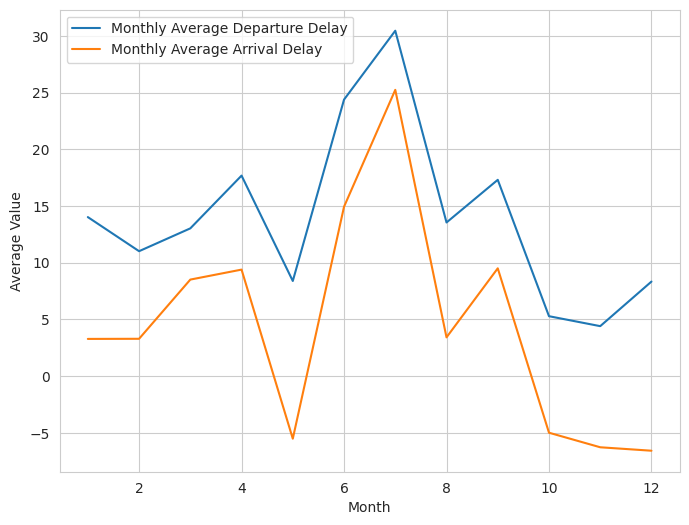

In [128]:
plt.figure()

plt.plot(monthly_delay.index, monthly_delay['dep_delay'].values, label='Monthly Average Departure Delay')
plt.plot(monthly_delay.index, monthly_delay['arr_delay'].values, label='Monthly Average Arrival Delay')


plt.xlabel('Month')
plt.ylabel('Average Value')

plt.legend()
plt.show()

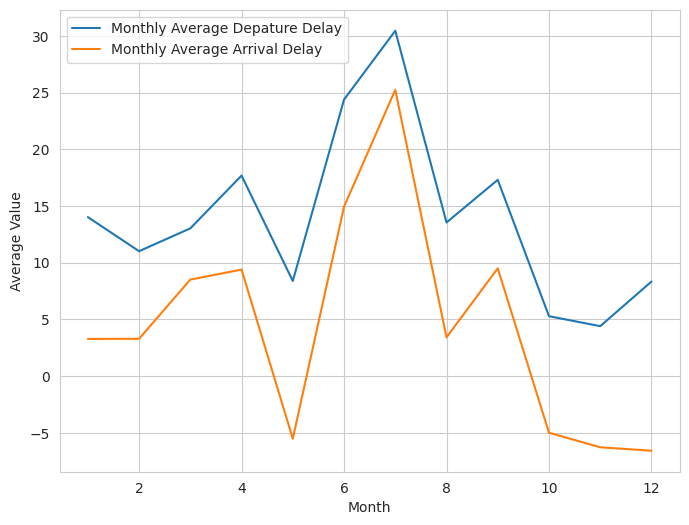

In [129]:
plt.figure()

plt.plot(monthly_delay.index, monthly_delay['dep_delay'].values, label='Monthly Average Depature Delay')
plt.plot(monthly_delay.index, monthly_delay['arr_delay'].values, label= 'Monthly Average Arrival Delay')

plt.xlabel('Month')
plt.ylabel('Average Value')

plt.legend()
plt.show()

We can create line plots using the plot method in `pandas` too.

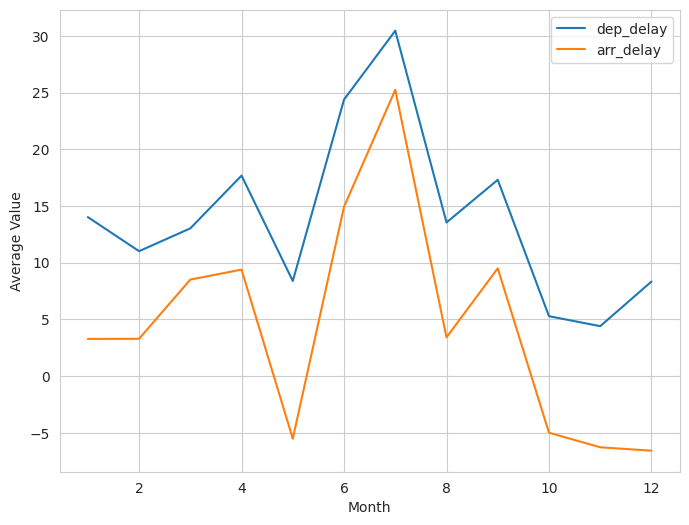

In [130]:
monthly_delay.plot()

plt.xlabel('Month')
plt.ylabel('Average Value')

plt.show()

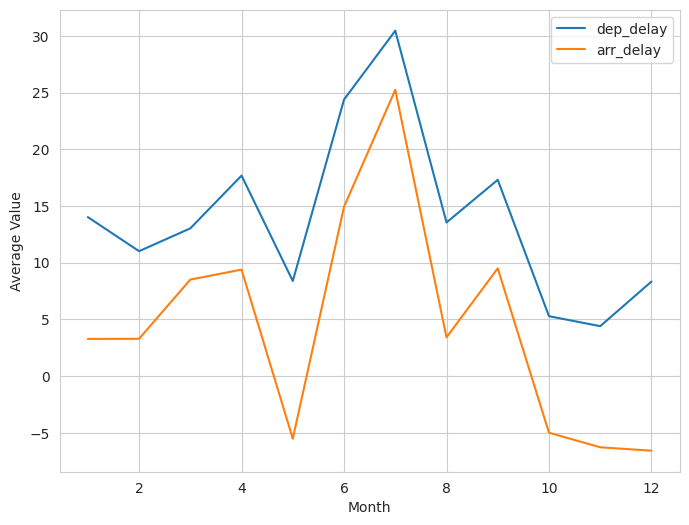

In [131]:
monthly_delay.plot()

plt.xlabel('Month')
plt.ylabel('Average Value')

plt.show()

This line plot shows that the departure and arrival delays are highly correlated. When there is a high departure delay, there is a high arrival delay also. A scatter plot can better verify this hypothesis.

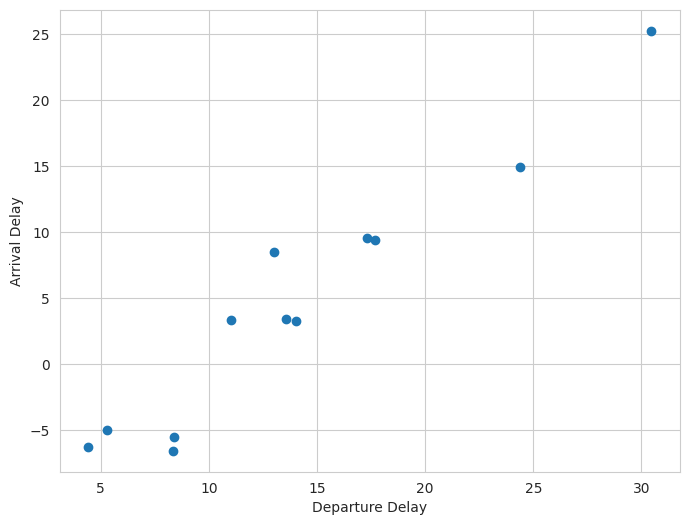

In [132]:
plt.figure()

plt.scatter(monthly_delay['dep_delay'], monthly_delay['arr_delay'])

plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')

plt.show()

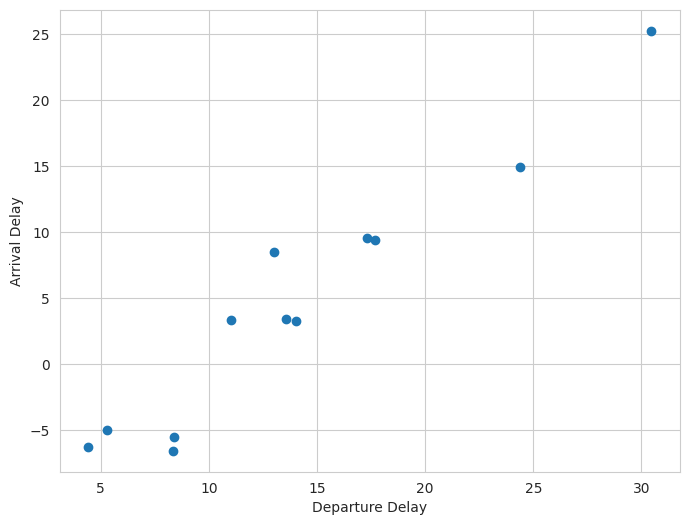

In [133]:
plt.figure()

plt.scatter(monthly_delay['dep_delay'], monthly_delay['arr_delay'] )


plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')

plt.show()

Line plots only make sense when there is some kind of semantic meaning to the ordering of entries in the dataset--in particular, it should be the case that there is significance to the consecutiveness. In the flights dataset, the distance does not have any order, and so we will get weird results from a line plot.

# ORDER GIVES MEANING YUH

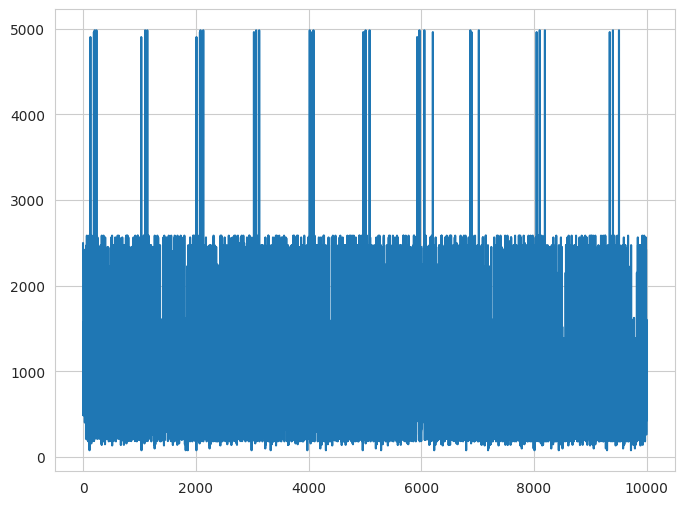

In [134]:
flights['distance'].head(10000).plot()
plt.show()

Caution: When plotting multiple line plots on the same plot, if they are on different scales, the larger one can "squash" the smaller one. In this scenario, it's better to visualize them separately or on a different axis.


CAUTION: WHEN PLOTTING MULTIPLE LINE PLOTS ON THE SAME PLOT , IF THEY ARE ON DIFFERENT SCALES, THE LARGER ONE CAN "SQUASH" THE SMALLER ONE. IN THIS SCENARIO, IT IS BETTER TO VISUALIZE THEM SEPARATELY OR ON A DIFFERENT AXIS

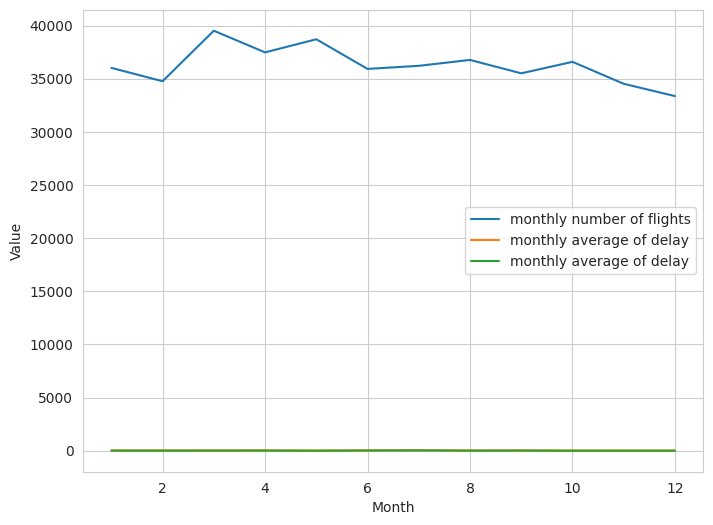

In [135]:
# Plotting monthly counts and delays in the same chart.

plt.figure()

plt.plot(monthly_counts.index, monthly_counts.values, label = 'monthly number of flights')
plt.plot(monthly_delay.index, monthly_delay.values, label = 'monthly average of delay')

plt.xlabel('Month')
plt.ylabel('Value')

plt.legend(loc = 'center right')

plt.show()

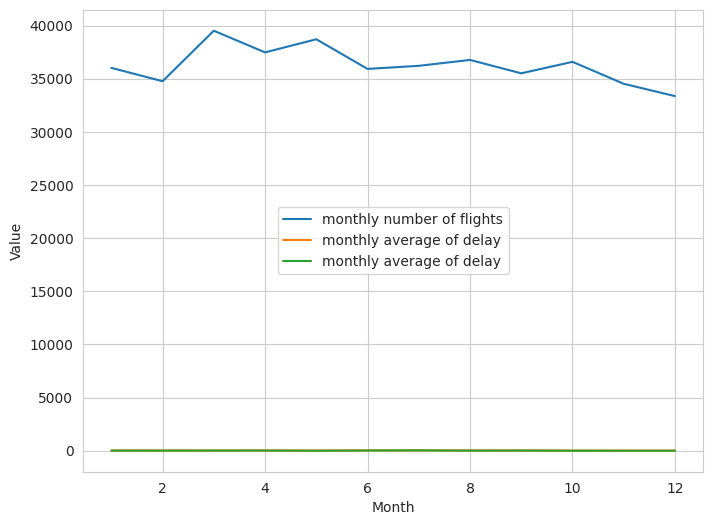

In [136]:
# Plotting monthly counts and delays in the same chart.
plt.figure()

plt.plot(monthly_counts.index, monthly_counts.values,  label = 'monthly number of flights')
plt.plot(monthly_delay.index, monthly_delay.values, label = 'monthly average of delay')



plt.xlabel('Month')
plt.ylabel('Value')

plt.legend(loc = 'center')


plt.show()

Here are all the possible loc values you can use for the legend in Matplotlib:

'best' (0)
'upper right' (1)
'upper left' (2)
'lower left' (3)
'lower right' (4)
'right' (5)
'center left' (6)
'center right' (7)
'lower center' (8)
'upper center' (9)
'center' (10)


## Subplots

Subplots are a great way to showcase multiple visualizations at once. They can include multiple plots of the same type in order to show some differentiation in data or they can include multiple types of plots concerning the same data. We will see an example of the latter below but you can find more information [here](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html).

The general syntax for subplots is:

    plt.subplots(n_rows, n_columns)
    
    plt.subplot(n_rows, n_columns, 1)
    # insert matplotlib code to draw 1st plot
    
    plt.subplot(n_rows, n_columns, 2)
    # insert matplotlib code to draw 2nd plot
    
    ...
    
    plt.show()

Let's look at an example:

Subplots = Multiple Vizzes at once


GENERAL SYNTAX

plt.subplots(n_rows, n_columns)


plt.subplots(n_rows, n_columns, 1)

plt.subplots(n_rows, n_columns, 2)

plt.subplots(n_rows, n_columns, 3)


plt.show()

In [ ]:
plt.subplots(1, 2, figsize = (13,5))

plt.subplot(1, 2, 1)
plt.plot(monthly_counts.index, monthly_counts.values)

plt.xlabel('Month')
plt.ylabel('Total flights')

plt.subplot(1, 2, 2)
plt.plot(monthly_delay.index, monthly_delay.values)

plt.xlabel('Month')
plt.ylabel('Avg Delay')

plt.tight_layout() # This adjusts the space between the charts

plt.show()

Another approach to visualize multiple charts together is to use twin axis plots.

In [ ]:
fig, axis = plt.subplots(figsize = (13,5))


axis.plot(monthly_counts.index, monthly_counts.values, ls = '--', lw = 1.5, c = 'black')

axis2 = axis.twinx()

axis2.plot(monthly_delay.index, monthly_delay.values, lw = 1.5)


axis.set_xlabel('Month')
axis.set_ylabel('Total flights')

axis2.set_ylabel('Avg Delay')


plt.show()

---

#### Exercise 4

1. Create a subplot with 1 row and 2 columns and visualize the average distance traveled for each manufacturer and the arrival delay versus the aircraft age. Choose the appropriate chart for these two visualizations.
    
---

In [ ]:
plt.subplots(1, 2, figsize = (13, 5))

plt.subplot(1, 2, 1)
plt.plot(monthly_counts.index, monthly_counts.values)


plt.xlabel('Month')
plt.ylabel('Total flights')


plt.subplot(1, 2, 2)
plt.plot(monthly_delay.index, monthly_delay.values)

plt.xlabel('Month')
plt.ylabel('Avg Delay')

plt.tight_layout()

plt.show()

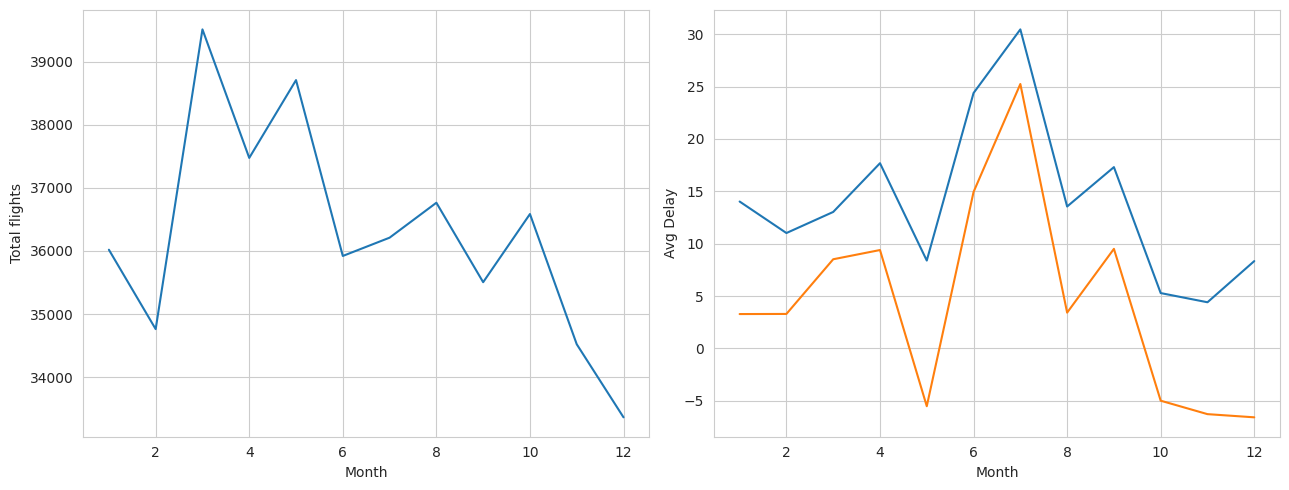

In [143]:
# Write your code here

plt.subplots(1, 2, figsize = (13, 5))
plt.subplot(1, 2, 1)
plt.plot(monthly_counts.index, monthly_counts.values)


plt.xlabel('Month')
plt.ylabel('Total flights')

plt.subplot(1, 2, 2)
plt.plot(monthly_delay.index, monthly_delay.values)


plt.xlabel('Month')
plt.ylabel('Avg Delay')

plt.tight_layout()


plt.show()

## Seaborn

The Seaborn package is built on top of Matplotlib providing an easy-to-use interface for drawing statistical charts. So we can still use Matplotlib commands (like `plt.show`) when creating Seaborn visualizations.

The seaborn package was built on the matplotlib


seaborn ~ plt.show

In [ ]:
import seaborn as sns

sns.set_style('whitegrid') # setting the default style of plots for the notebook

In [145]:
import seaborn as sns
sns.set_style('whitegrid')


import seaborn as sns
sns.set_style('whitegrid')


import seaborn as sns
sns.set_style('whitegrid')

import seaborn as sns
sns.set_style('whitegrid')

import seaborn as sns
sns.set_style('whitegrid')

import seaborn as sns
sns.set_style('whitegrid')

import seaborn as sns
sns.set_style('whitegrid')


import seaborn as sns
sns.set_stlye('whitegrid')

import seaborn as sns
sns.set_style('whitegrid')

import seaborn as sns
sns.set_style('whitegrid')


import seaborn as sns
sns.set_style('whitegrid')







The basic structure of a Seaborn plot is:

    sns.graph_type_of_choice(data = your_data_frame,
                             x = column_name_of_x_variable,
                             y = column_name_of_y_variable)
    plt.show()
    


Let's recreate some of the visuals from our matplotlib exploration in seaborn.

### Scatter Plots

In [ ]:
# basic seaborn plot structure

sns.graph_type_of_choice(data = your_data_frame,
                         x = column_name_of_x_variable
                         y = column_name_of_y_variable)

plt.show()

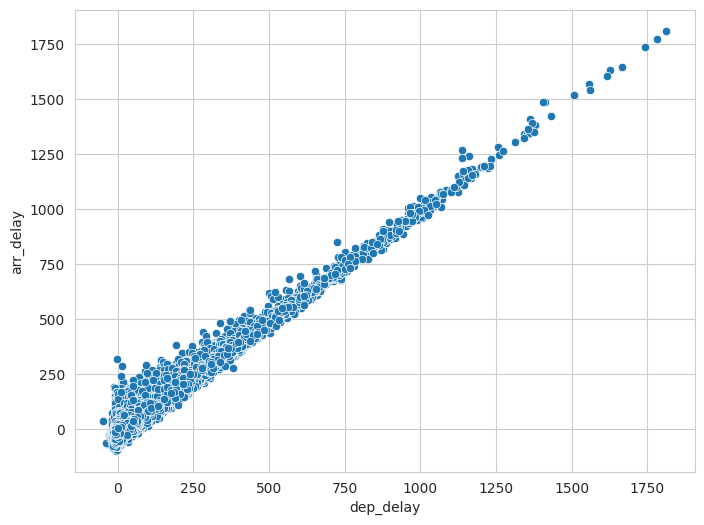

In [146]:
# Scatterplot in Seaborn

plt.figure(figsize=(8, 6))
sns.scatterplot(data=flights, x='dep_delay', y='arr_delay')

plt.show()

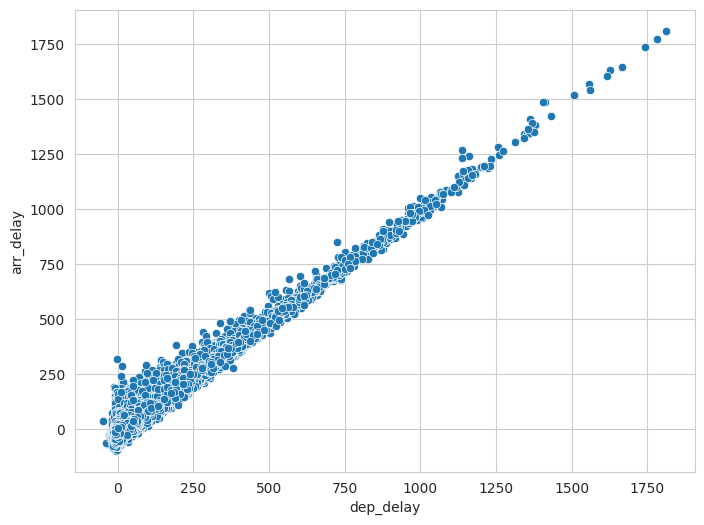

In [149]:
#Scatterplot in Seaborn
plt.figure(figsize=(8, 6))

sns.scatterplot(data= flights, x = 'dep_delay', y ='arr_delay' )
plt.show()





Seaborn makes it very easy to add more information to a scatter plot. The main way is by adding another mapping from another variable to another channel. Let's add a mapping from the `clarity` variable to `hue`:

In [ ]:
# Seaborn makes it easy for me to add more info to a scatterplot

In [ ]:
# lowering alpha makes points slightly more transparent

plt.figure(figsize=(15, 10))

sns.scatterplot(data=flights, x='dep_delay', y='arr_delay', hue='origin', alpha=0.3)

plt.show()

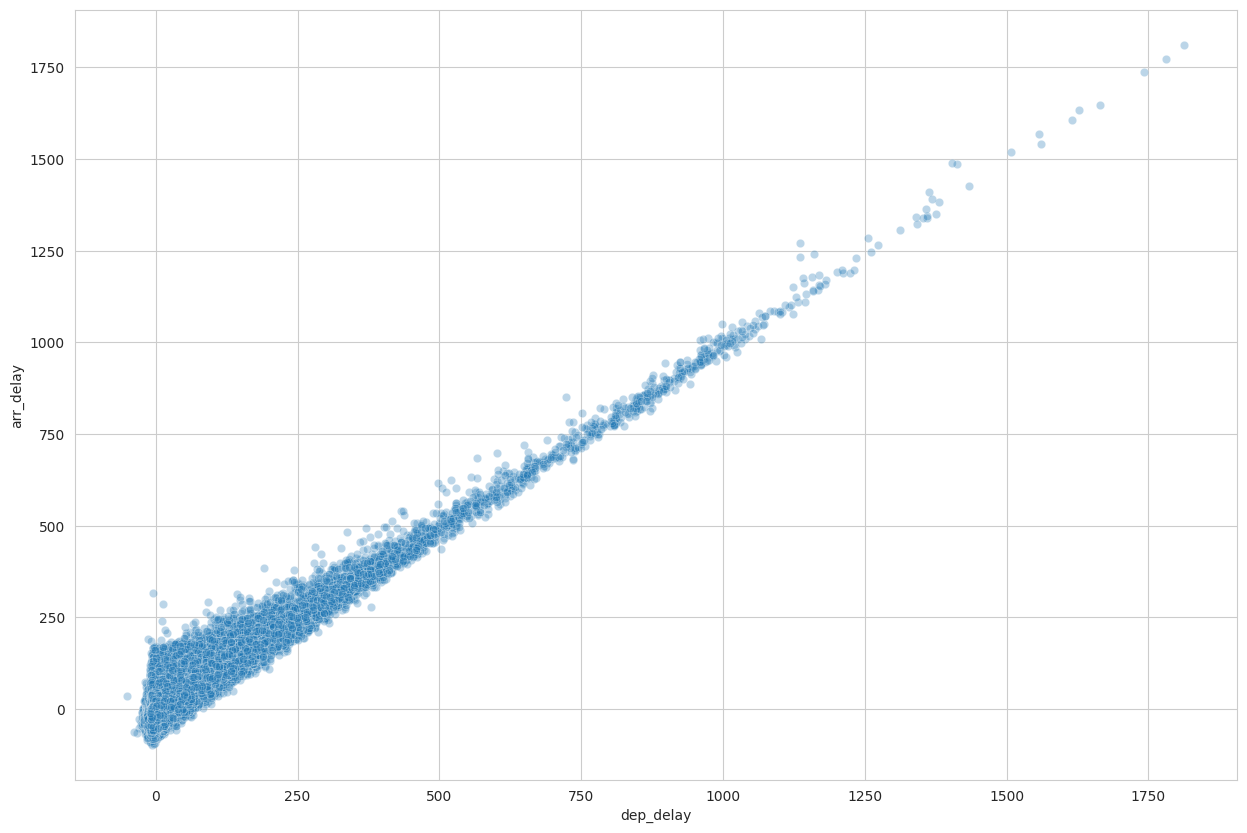

In [151]:
plt.figure(figsize= (15, 10 ) )
sns.scatterplot(data=flights, x = 'dep_delay', y= 'arr_delay', alpha =0.3 )
plt.show()

### Scatter Matrices
A scatter matrix is a matrix of scatterplots, visualizing up to every pair of columns from your data as a scatterplot. The scatter matrix maps pairs of columns to canvases. These visualizations are useful enough that it is implemented in seaborn as its own function.

In [ ]:
#Scatter Matrices
#A scatter matrix is a matrix of scatterplots, visualizing up to every pair of columns from oyur data as a scatterplot.
#The scatter matrix maps pairs of columns to canvases.
#These scatter matrix maps pairs of columns to canvases.
#These visualizations are useful enough that it is implemented in seaborn as its own function

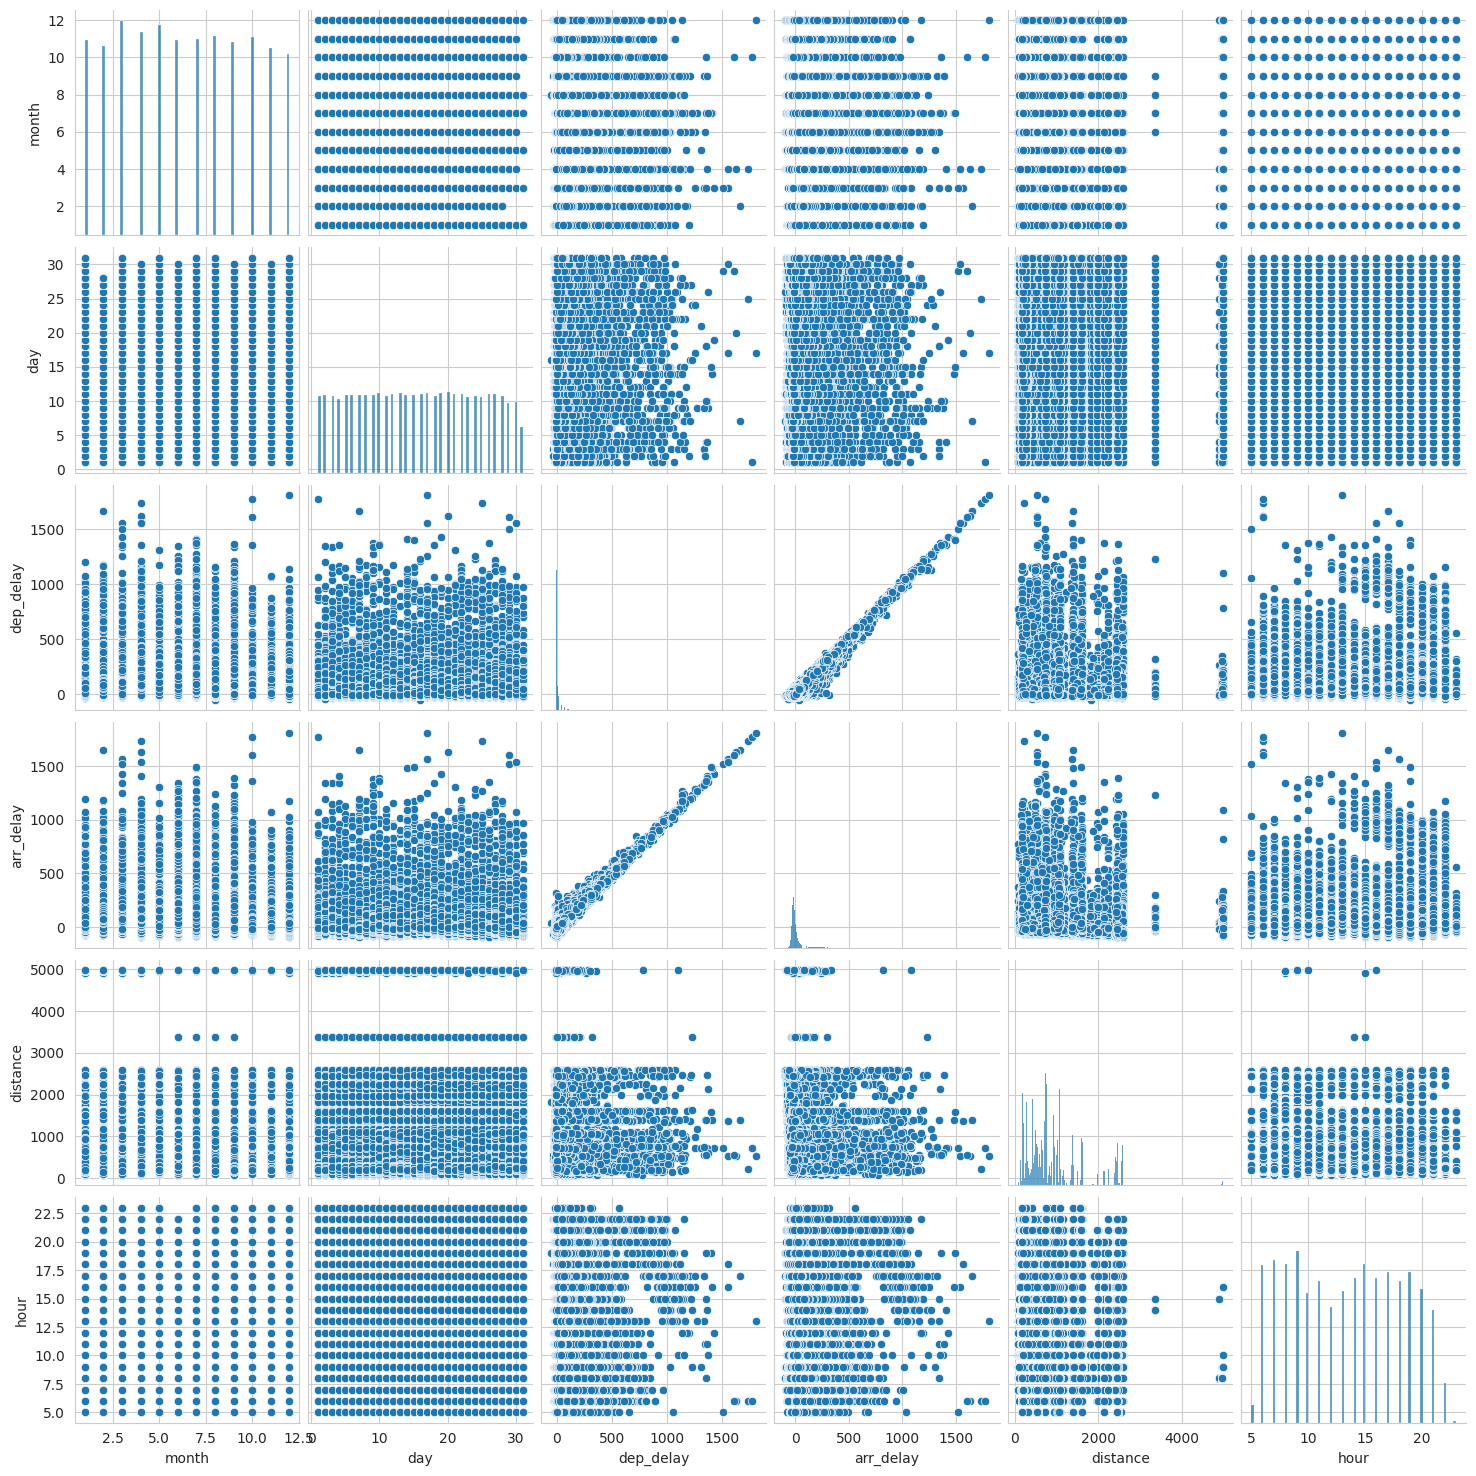

In [152]:
sns.pairplot(flights[['month', 'day',  'dep_delay', 'arr_delay','distance', 'hour']])

plt.show()

# Key Takeaways

- Joining dataframes allows us to combine information from multiple sources for comprehensive analysis.
- Aggregating data lets us summarize and extract key insights from varied datasets, helping us explore the data and find potentially useful relationships to quantify KPIs (key performance indicators) across many data sources.
- Visualization techniques help communicate complex data patterns in an easily digestible format which allow for a faster business decision-making process.


# Next Up
#### Lesson 4

Now that we have learned all the tools for processing and cleaning a dataset, in the next lesson, we will work through a real project and implement all of these techniques. Along the way, we’ll explore industry norms for handling raw data, cleaning it, and preparing it for exploratory data analysis and modeling.

# Final Project Progress Checkpoint
Review the full project details and requirements under the Projects Section on Synapse.

Project Overview

# Assignment 3
###### Take-Home Practice

1. Which model of aircraft flew the most flights out of New York in 2023?


2. Use the file `customer_info.csv` to perform the exercise.    
    1. Create a new DataFrame called construction which contains all the customers in the "Construction" industry with over 0 spend on mobility products. Using this DataFrame, create a scatterplot with Mobility revenue on the vertical axis and number of employees on the horizontal axis. Does this tell you anything about the relationship between Mobility revenue and number of employees? What does it tell you?

    2. Copy the code from part (1) and add in two lines underneath: plt.xscale('log') and plt.yscale('log'). These two lines rescale the axes so that instead of showing the raw figures, the logarithm of the figures is shown instead. This is often a useful transformation for data that is extremely skewed. How does the rescaled plot differ from the plot you created in part 1? Why? Can you discern anything about the relationship between Mobility revenue and number of employees that you couldn't before?

    3. Repeat parts (1) and (2) for the Agriculture industry. How does the relationship between Mobility and number of employees differ in this industry from the Construction industry? Why do you think that might be?

# Supplementary Topics

While Matplotlib and Seaborn offer intuitive and straightforward plotting capabilities, Python also includes several more sophisticated libraries for creating dynamic plots.

We will look into one of them briefly below, but you are encouraged to explore their documentation to discover the impressive plotting applications supported by Python:

- Altair: https://altair-viz.github.io/gallery/index.html
- Plotly: https://plot.ly/python/#basic-charts
- Bokeh: https://docs.bokeh.org/en/latest/docs/gallery.html
- ggplot (R library): https://ggplot2.tidyverse.org/

### Bokeh

Most of the plotting we will do in this course will be with Matplotlib, but we will have a short look at Bokeh with the aim of easily creating interactive plots.  This graphing package comes with many tools for interactivity, including zooming, selecting, panning, and more. This will let us get a "closer look" at the data we're graphing.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

The general syntax for a Bokeh plot is as follows:
1. Define the `TOOLS` you want (e.g. pan, wheel_zoom, etc.).
2. Declare a variable name for the `figure()`, like we did with `plt.figure()`.
3. Feed `figure()` arguments for your graph, such as `title`, `plot_width` or `height`, and `tools=TOOLS`.
4. Define the `xaxis` and `yaxis` `.axis_labels`.
5. Decide what kind of plot you want (e.g.: `line`,`scatter`, etc.), and declare what your x and y axes will be.
6. Call `show(variable_name)` to display the graph

So if we were going to plot the open prices from `df2` as a line graph, we would write:

In [ ]:
df2 = pd.read_csv('data/goog.csv')

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p1 = figure(title="Futures Prices", tools=TOOLS, x_axis_type='datetime')

p1.line(df2.index, df2['Open'], legend_label="Open")

p1.xaxis.axis_label = 'Index'
p1.yaxis.axis_label = 'Price'

show(p1)

Try moving the graph around, zooming with box-zoom or wheel zoom, and then using the reset button to return the graph to its original position.

This sort of plotting barely scratches the surface of what Bokeh is capable of.  Here is one of the front-page examples from their gallery, creating a scatter plot of different sized discs with a range of colors:

In [ ]:
# generate some random data

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5

# assign colors

colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# specify tools are shown in the visual
TOOLS = "hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p)

---

#### Exercise 5

1. Modify the code for the initial line chart to show both the High and Low values from `df2`.
    
---


In [ ]:
# Write your code here

### Plotly

Another popular library for building interactive charts and dashboards is **plotly**. plotly.py is an interactive Python library for creating web-based visualizations. Built on the power of plotly.js, it provides a high-level
interface for crafting over 30 types of charts, including scientific, statistical, and financial visuals.

plotly supports two APIs for generating charts.

- plotly Express: High-level API Suitable for quickly generating visualizations for ad hoc analysis.
- plotly Graph Objects: Low -level API suitable for generating more customized visualizations such as overlaid histograms and arbitrary subplot grids.

To learn more about these two APIs, you can refer to their website [here](https://plot.ly/), and the python specific page [here](https://plot.ly/python/).

Below, we will use plotly express to recreate the above charts.

In [ ]:
# importing plotly express

import plotly.express as px

In [ ]:
fig = px.line(data_frame=df2, x = 'Date', y = 'Open', title="Futures Prices")

fig.update_layout(

    xaxis_title='Date',
    yaxis_title='Price'

)

fig.show()

This is an interactive plot. You can hover over the chart to see the values or even zoom in and out.

We can also create scatter plots, bar charts, histograms or box plots. Below is an example for creating a scatter plot.

In [ ]:
fig = px.scatter(x = x, y = y, title="Scatter plot", size=radii, color = colors)

fig.update_layout(

    xaxis_title='X',
    yaxis_title='Y'

)

fig.show()

<div id="container" style="position:relative;">
<div style="position:relative; float:right">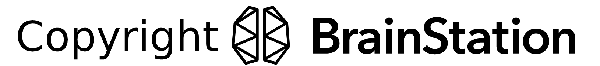
</div>